In [1]:
# Install all required packages in Colab
!pip install -q pandas numpy matplotlib seaborn scipy scikit-learn statsmodels plotly

In [4]:
# ============================================================================
# CELL 1: IMPORTS & SETUP
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import warnings
import os

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
np.random.seed(42)

print("=" * 80)
print("🚀 SAFESWAP.AI - DATA SCIENCE PIPELINE")
print("=" * 80)
print("✅ All libraries imported successfully!")
print(f"📦 Pandas: {pd.__version__}")
print(f"📦 NumPy: {np.__version__}")
print(f"📦 Matplotlib: {plt.matplotlib.__version__}")

🚀 SAFESWAP.AI - DATA SCIENCE PIPELINE
✅ All libraries imported successfully!
📦 Pandas: 2.2.2
📦 NumPy: 2.0.2
📦 Matplotlib: 3.10.0


In [5]:
# ============================================================================
# CELL 2: LOAD ALL 5 DATASETS
# ============================================================================
print("\n" + "=" * 80)
print("📂 LOADING ALL DATA SOURCES")
print("=" * 80)

# Define file paths (relative to notebook location: ./ds/)
CG_DATA_01 = './api/data/cg_data_01.csv'
CG_DATA_02 = './api/data/cg_data_02.csv'
CMC_API_01 = './api/data/cmc_data_01.csv'
CMC_API_02 = './api/data/cmc_data_02.csv'
CMC_SCRAPER = './scraper/data/crypto_data_coinmarketcap.csv'

# Track loaded datasets
datasets = {}
failed_loads = []

# 1. CoinGecko Historical (cg_data_01.csv)
print("\n1️⃣ Loading CoinGecko Historical (cg_data_01.csv)...")
try:
    cg_hist = pd.read_csv(CG_DATA_01)
    cg_hist['data_source'] = 'coingecko_api_historical'
    datasets['cg_historical'] = cg_hist
    print(f"   ✅ Loaded: {len(cg_hist)} records")
    print(f"   📅 Date range: {cg_hist['date'].min()} to {cg_hist['date'].max()}")
    print(f"   🪙 Tokens: {cg_hist['token_id'].nunique()}")
except Exception as e:
    print(f"   ❌ Failed: {e}")
    failed_loads.append('cg_data_01.csv')

# 2. CoinGecko Historical + Current (cg_data_02.csv)
print("\n2️⃣ Loading CoinGecko Historical + Current (cg_data_02.csv)...")
try:
    cg_full = pd.read_csv(CG_DATA_02)
    cg_full['data_source'] = 'coingecko_api_full'
    datasets['cg_full'] = cg_full
    print(f"   ✅ Loaded: {len(cg_full)} records")
    print(f"   📅 Date range: {cg_full['date'].min()} to {cg_full['date'].max()}")
    print(f"   🪙 Tokens: {cg_full['token_id'].nunique()}")
    print(f"   📊 Sources breakdown:")
    print(cg_full['source'].value_counts())
except Exception as e:
    print(f"   ❌ Failed: {e}")
    failed_loads.append('cg_data_02.csv')

# 3. CoinMarketCap API 01 (cmc_data_01.csv)
print("\n3️⃣ Loading CoinMarketCap API 01 (cmc_data_01.csv)...")
try:
    cmc_api_01 = pd.read_csv(CMC_API_01)
    cmc_api_01['data_source'] = 'coinmarketcap_api_01'
    datasets['cmc_api_01'] = cmc_api_01
    print(f"   ✅ Loaded: {len(cmc_api_01)} records")
    print(f"   📅 Date: {cmc_api_01['date'].unique()}")
    print(f"   🪙 Tokens: {cmc_api_01['symbol'].nunique()}")
except Exception as e:
    print(f"   ❌ Failed: {e}")
    failed_loads.append('cmc_data_01.csv')

# 4. CoinMarketCap API 02 (cmc_data_02.csv)
print("\n4️⃣ Loading CoinMarketCap API 02 (cmc_data_02.csv)...")
try:
    cmc_api_02 = pd.read_csv(CMC_API_02)
    cmc_api_02['data_source'] = 'coinmarketcap_api_02'
    datasets['cmc_api_02'] = cmc_api_02
    print(f"   ✅ Loaded: {len(cmc_api_02)} records")
    print(f"   📅 Date: {cmc_api_02['date'].unique()}")
    print(f"   🪙 Tokens: {cmc_api_02['symbol'].nunique()}")
except Exception as e:
    print(f"   ❌ Failed: {e}")
    failed_loads.append('cmc_data_02.csv')

# 5. CoinMarketCap Scraper (crypto_data_coinmarketcap.csv)
print("\n5️⃣ Loading CoinMarketCap Scraper (crypto_data_coinmarketcap.csv)...")
try:
    cmc_scraper = pd.read_csv(CMC_SCRAPER)
    cmc_scraper['data_source'] = 'coinmarketcap_scraper'
    datasets['cmc_scraper'] = cmc_scraper
    print(f"   ✅ Loaded: {len(cmc_scraper)} records")
    print(f"   📅 Date range: {cmc_scraper['date'].min()} to {cmc_scraper['date'].max()}")
    print(f"   🪙 Tokens: {cmc_scraper['token_symbol'].nunique()}")
except Exception as e:
    print(f"   ❌ Failed: {e}")
    failed_loads.append('crypto_data_coinmarketcap.csv')

# Summary
print("\n" + "=" * 80)
print("📊 DATA LOADING SUMMARY")
print("=" * 80)
print(f"✅ Successfully loaded: {len(datasets)}/5 datasets")
if failed_loads:
    print(f"❌ Failed to load: {', '.join(failed_loads)}")
print(f"\n📈 Total raw records across all sources: {sum(len(df) for df in datasets.values())}")




📂 LOADING ALL DATA SOURCES

1️⃣ Loading CoinGecko Historical (cg_data_01.csv)...
   ✅ Loaded: 4026 records
   📅 Date range: 2024-11-18 to 2025-11-17
   🪙 Tokens: 11

2️⃣ Loading CoinGecko Historical + Current (cg_data_02.csv)...
   ✅ Loaded: 827 records
   📅 Date range: 2024-11-18 to 2025-11-17
   🪙 Tokens: 19
   📊 Sources breakdown:
source
coingecko_historical    732
coingecko_current        95
Name: count, dtype: int64

3️⃣ Loading CoinMarketCap API 01 (cmc_data_01.csv)...
   ✅ Loaded: 20 records
   📅 Date: ['2025-11-17']
   🪙 Tokens: 20

4️⃣ Loading CoinMarketCap API 02 (cmc_data_02.csv)...
   ✅ Loaded: 80 records
   📅 Date: ['2025-11-17']
   🪙 Tokens: 20

5️⃣ Loading CoinMarketCap Scraper (crypto_data_coinmarketcap.csv)...
   ✅ Loaded: 7562 records
   📅 Date range: 2024-10-15 to 2025-11-16
   🪙 Tokens: 19

📊 DATA LOADING SUMMARY
✅ Successfully loaded: 5/5 datasets

📈 Total raw records across all sources: 12515


In [7]:
# ============================================================================
# CELL 3: DATA STANDARDIZATION & HARMONIZATION
# ============================================================================
print("\n" + "=" * 80)
print("🔧 DATA STANDARDIZATION & HARMONIZATION")
print("=" * 80)

# Create standardized dataframes with unified column names
standardized_dfs = []

# 1. Process CoinGecko data (both files use same schema)
print("\n1️⃣ Standardizing CoinGecko data...")
for key in ['cg_historical', 'cg_full']:
    if key in datasets:
        df = datasets[key].copy()

        # Rename columns to standard format
        df_std = pd.DataFrame({
            'timestamp': pd.to_numeric(df['timestamp'], errors='coerce'),
            'date': pd.to_datetime(df['date'], errors='coerce'),
            'token_symbol': df['symbol'].astype(str).str.upper().replace('nan', ''),
            'token_id': df['token_id'].astype(str),
            'token_name': df['name'].astype(str).replace('nan', ''),
            'price': pd.to_numeric(df['price'], errors='coerce'),
            'market_cap': pd.to_numeric(df['market_cap'], errors='coerce'),
            'volume_24h': pd.to_numeric(df['total_volume'], errors='coerce'),
            'high_24h': pd.to_numeric(df['high_24h'], errors='coerce'),
            'low_24h': pd.to_numeric(df['low_24h'], errors='coerce'),
            'price_change_24h': pd.to_numeric(df['price_change_24h'], errors='coerce'),
            'price_change_pct_24h': pd.to_numeric(df['price_change_percentage_24h'], errors='coerce'),
            'circulating_supply': pd.to_numeric(df['circulating_supply'], errors='coerce'),
            'total_supply': pd.to_numeric(df['total_supply'], errors='coerce'),
            'ath': pd.to_numeric(df['ath'], errors='coerce'),
            'ath_date': pd.to_datetime(df['ath_date'], errors='coerce'),
            'data_source': df['data_source'],
            'original_source': df['source']
        })

        standardized_dfs.append(df_std)
        print(f"   ✅ {key}: {len(df_std)} records standardized")

# 2. Process CoinMarketCap API data
print("\n2️⃣ Standardizing CoinMarketCap API data...")
for key in ['cmc_api_01', 'cmc_api_02']:
    if key in datasets:
        df = datasets[key].copy()

        # Create mapping for CMC symbols to token_id (based on common tokens)
        symbol_to_id = {
            'BTC': 'bitcoin', 'ETH': 'ethereum', 'SOL': 'solana',
            'ADA': 'cardano', 'XRP': 'ripple', 'DOT': 'polkadot',
            'DOGE': 'dogecoin', 'AVAX': 'avalanche-2', 'LINK': 'chainlink',
            'MATIC': 'polygon', 'UNI': 'uniswap', 'LTC': 'litecoin',
            'XLM': 'stellar', 'ATOM': 'cosmos', 'XMR': 'monero',
            'TRX': 'tron', 'ETC': 'ethereum-classic', 'FIL': 'filecoin',
            'HBAR': 'hedera-hashgraph', 'APT': 'aptos'
        }

        df_std = pd.DataFrame({
            'timestamp': pd.to_numeric(df['timestamp'], errors='coerce'),
            'date': pd.to_datetime(df['date'], errors='coerce'),
            'token_symbol': df['symbol'].astype(str).str.upper(),
            'token_id': df['symbol'].astype(str).str.upper().map(symbol_to_id),
            'token_name': df['name'].astype(str),
            'price': pd.to_numeric(df['price'], errors='coerce'),
            'market_cap': pd.to_numeric(df['market_cap'], errors='coerce'),
            'volume_24h': pd.to_numeric(df['volume_24h'], errors='coerce'),
            'high_24h': np.nan,  # Not available in CMC API
            'low_24h': np.nan,   # Not available in CMC API
            'price_change_24h': np.nan,  # Not directly available
            'price_change_pct_24h': pd.to_numeric(df['percent_change_24h'], errors='coerce'),
            'percent_change_1h': pd.to_numeric(df['percent_change_1h'], errors='coerce'),
            'percent_change_7d': pd.to_numeric(df['percent_change_7d'], errors='coerce'),
            'circulating_supply': pd.to_numeric(df['circulating_supply'], errors='coerce'),
            'total_supply': pd.to_numeric(df['total_supply'], errors='coerce'),
            'max_supply': pd.to_numeric(df['max_supply'], errors='coerce'),
            'market_cap_dominance': pd.to_numeric(df['market_cap_dominance'], errors='coerce'),
            'ath': np.nan,       # Not available
            'ath_date': pd.NaT,  # Not available
            'data_source': df['data_source'],
            'original_source': df['source']
        })

        standardized_dfs.append(df_std)
        print(f"   ✅ {key}: {len(df_std)} records standardized")

# 3. Process CoinMarketCap Scraper data (OHLCV format)
print("\n3️⃣ Standardizing CoinMarketCap Scraper data...")
if 'cmc_scraper' in datasets:
    df = datasets['cmc_scraper'].copy()

    # Symbol mapping
    symbol_to_id = {
        'BITCOIN': 'bitcoin', 'ETHEREUM': 'ethereum', 'SOLANA': 'solana',
        'CARDANO': 'cardano', 'XRP': 'ripple', 'POLKADOT': 'polkadot',
        'DOGECOIN': 'dogecoin', 'AVALANCHE': 'avalanche-2', 'CHAINLINK': 'chainlink',
        'POLYGON': 'polygon', 'UNISWAP': 'uniswap', 'LITECOIN': 'litecoin',
        'STELLAR': 'stellar', 'COSMOS': 'cosmos', 'MONERO': 'monero',
        'TRON': 'tron', 'ETHEREUM CLASSIC': 'ethereum-classic', 'FILECOIN': 'filecoin',
        'HEDERA': 'hedera-hashgraph', 'APTOS': 'aptos'
    }

    df_std = pd.DataFrame({
        'timestamp': pd.to_datetime(df['date']).astype(np.int64) // 10**9,
        'date': pd.to_datetime(df['date'], errors='coerce'),
        'token_symbol': df['token_symbol'].astype(str).str.upper(),
        'token_id': df['token_symbol'].astype(str).str.upper().map(symbol_to_id),
        'token_name': df['token_name'].astype(str),
        'price': pd.to_numeric(df['close'], errors='coerce'),  # Use close as price
        'open': pd.to_numeric(df['open'], errors='coerce'),
        'high': pd.to_numeric(df['high'], errors='coerce'),
        'low': pd.to_numeric(df['low'], errors='coerce'),
        'close': pd.to_numeric(df['close'], errors='coerce'),
        'market_cap': pd.to_numeric(df['market_cap'], errors='coerce'),
        'volume_24h': pd.to_numeric(df['volume'], errors='coerce'),
        'high_24h': pd.to_numeric(df['high'], errors='coerce'),
        'low_24h': pd.to_numeric(df['low'], errors='coerce'),
        'price_change_24h': np.nan,
        'price_change_pct_24h': np.nan,
        'circulating_supply': np.nan,
        'total_supply': np.nan,
        'ath': np.nan,
        'ath_date': pd.NaT,
        'data_source': df['data_source'],
        'original_source': df['source']
    })

    standardized_dfs.append(df_std)
    print(f"   ✅ cmc_scraper: {len(df_std)} records standardized")

# Combine all standardized dataframes
print("\n4️⃣ Combining all standardized data...")
df_combined = pd.concat(standardized_dfs, ignore_index=True, sort=False)

print(f"   ✅ Combined dataset created: {len(df_combined)} total records")
print(f"\n📊 Records by data source:")
print(df_combined['data_source'].value_counts())
print(f"\n🪙 Unique tokens: {df_combined['token_id'].nunique()}")
print(f"📅 Date range: {df_combined['date'].min()} to {df_combined['date'].max()}")


🔧 DATA STANDARDIZATION & HARMONIZATION

1️⃣ Standardizing CoinGecko data...
   ✅ cg_historical: 4026 records standardized
   ✅ cg_full: 827 records standardized

2️⃣ Standardizing CoinMarketCap API data...
   ✅ cmc_api_01: 20 records standardized
   ✅ cmc_api_02: 80 records standardized

3️⃣ Standardizing CoinMarketCap Scraper data...
   ✅ cmc_scraper: 7562 records standardized

4️⃣ Combining all standardized data...
   ✅ Combined dataset created: 12515 total records

📊 Records by data source:
data_source
coinmarketcap_scraper       7562
coingecko_api_historical    4026
coingecko_api_full           827
coinmarketcap_api_02          80
coinmarketcap_api_01          20
Name: count, dtype: int64

🪙 Unique tokens: 20
📅 Date range: 2024-10-15 00:00:00 to 2025-11-17 00:00:00


In [8]:
# ============================================================================
# CELL 4: DATA CLEANING
# ============================================================================
print("\n" + "=" * 80)
print("🧹 DATA CLEANING")
print("=" * 80)

df_clean = df_combined.copy()

print("\n1️⃣ Initial data quality check...")
print(f"   Total records: {len(df_clean)}")
print(f"   Missing values: {df_clean.isnull().sum().sum()}")
print(f"   Duplicates: {df_clean.duplicated().sum()}")

# 1. Convert timestamp to datetime if not already
print("\n2️⃣ Processing timestamps...")
if df_clean['timestamp'].dtype != 'datetime64[ns]':
    df_clean['timestamp_dt'] = pd.to_datetime(df_clean['timestamp'], unit='s', errors='coerce')
else:
    df_clean['timestamp_dt'] = df_clean['timestamp']

# Ensure date column is datetime
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

# Add time-based features
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day
df_clean['hour'] = df_clean['timestamp_dt'].dt.hour
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek
df_clean['day_name'] = df_clean['date'].dt.day_name()
df_clean['is_weekend'] = df_clean['day_of_week'].isin([5, 6]).astype(int)

print(f"   ✅ Datetime features created")

# 2. Handle missing token identifiers
print("\n3️⃣ Filling missing token identifiers...")
# Fill missing token_symbol from token_id
token_id_to_symbol = {
    'bitcoin': 'BTC', 'ethereum': 'ETH', 'solana': 'SOL',
    'cardano': 'ADA', 'ripple': 'XRP', 'polkadot': 'DOT',
    'dogecoin': 'DOGE', 'avalanche-2': 'AVAX', 'chainlink': 'LINK',
    'polygon': 'MATIC', 'uniswap': 'UNI', 'litecoin': 'LTC',
    'stellar': 'XLM', 'cosmos': 'ATOM', 'monero': 'XMR',
    'tron': 'TRX', 'ethereum-classic': 'ETC', 'filecoin': 'FIL',
    'hedera-hashgraph': 'HBAR', 'aptos': 'APT'
}

df_clean['token_symbol'] = df_clean.apply(
    lambda row: token_id_to_symbol.get(row['token_id'], row['token_symbol'])
    if pd.isna(row['token_symbol']) or row['token_symbol'] == ''
    else row['token_symbol'],
    axis=1
)

print(f"   ✅ Token symbols filled")
print(f"   🪙 Unique tokens: {df_clean['token_id'].nunique()}")

# 3. Remove invalid price data
print("\n4️⃣ Cleaning price data...")
before_price_clean = len(df_clean)
df_clean = df_clean[df_clean['price'] > 0]  # Remove zero/negative prices
print(f"   Removed {before_price_clean - len(df_clean)} invalid price records")

# 4. Handle zero/negative values in volume and market cap
df_clean.loc[df_clean['volume_24h'] <= 0, 'volume_24h'] = np.nan
df_clean.loc[df_clean['market_cap'] <= 0, 'market_cap'] = np.nan

# 5. Remove duplicates (same token + same timestamp)
print("\n5️⃣ Removing duplicates...")
before_dup = len(df_clean)
df_clean = df_clean.sort_values(['token_id', 'timestamp_dt', 'data_source'])
df_clean = df_clean.drop_duplicates(subset=['token_id', 'date'], keep='last')
df_clean = df_clean.reset_index(drop=True)
print(f"   Removed {before_dup - len(df_clean)} duplicate records")

# 6. Sort by token and timestamp
df_clean = df_clean.sort_values(['token_id', 'timestamp_dt']).reset_index(drop=True)

print(f"\n✅ Cleaned dataset: {len(df_clean)} records")
print(f"   📅 Date range: {df_clean['date'].min()} to {df_clean['date'].max()}")
print(f"   🪙 Tokens: {df_clean['token_id'].nunique()}")




🧹 DATA CLEANING

1️⃣ Initial data quality check...
   Total records: 12515
   Missing values: 155398
   Duplicates: 0

2️⃣ Processing timestamps...
   ✅ Datetime features created

3️⃣ Filling missing token identifiers...
   ✅ Token symbols filled
   🪙 Unique tokens: 20

4️⃣ Cleaning price data...
   Removed 5 invalid price records

5️⃣ Removing duplicates...
   Removed 5065 duplicate records

✅ Cleaned dataset: 7445 records
   📅 Date range: 2024-10-15 00:00:00 to 2025-11-17 00:00:00
   🪙 Tokens: 19


In [9]:
# ============================================================================
# CELL 5: MISSING VALUE ANALYSIS & HANDLING
# ============================================================================
print("\n" + "=" * 80)
print("🔍 MISSING VALUE ANALYSIS")
print("=" * 80)

print("\n1️⃣ Missing value summary:")
missing_summary = pd.DataFrame({
    'Column': df_clean.columns,
    'Missing_Count': df_clean.isnull().sum(),
    'Missing_Percentage': (df_clean.isnull().sum() / len(df_clean) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)
print(missing_summary.to_string())

print("\n2️⃣ Handling missing values...")
# For price-derived features, calculate from available data
for token in df_clean['token_id'].unique():
    mask = df_clean['token_id'] == token
    token_df = df_clean[mask].copy()

    # Calculate price_change_24h if missing
    if token_df['price_change_24h'].isna().any():
        df_clean.loc[mask, 'price_change_24h_calc'] = df_clean.loc[mask, 'price'].diff()

    # Calculate price_change_pct_24h if missing
    if token_df['price_change_pct_24h'].isna().any():
        df_clean.loc[mask, 'price_change_pct_24h_calc'] = df_clean.loc[mask, 'price'].pct_change() * 100

# Fill calculated values where original is missing
df_clean['price_change_24h'] = df_clean['price_change_24h'].fillna(df_clean['price_change_24h_calc'])
df_clean['price_change_pct_24h'] = df_clean['price_change_pct_24h'].fillna(df_clean['price_change_pct_24h_calc'])

# Forward fill for time series data
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_clean[col] = df_clean.groupby('token_id')[col].fillna(method='ffill').fillna(method='bfill')

print(f"   ✅ Missing values handled")
print(f"   Remaining missing: {df_clean.isnull().sum().sum()}")

print("\n✅ Data cleaning complete!")
print(f"📊 Final cleaned dataset: {len(df_clean)} records, {df_clean.shape[1]} columns")




🔍 MISSING VALUE ANALYSIS

1️⃣ Missing value summary:
                                    Column  Missing_Count  Missing_Percentage
price_change_24h          price_change_24h           7445          100.000000
ath                                    ath           7445          100.000000
ath_date                          ath_date           7445          100.000000
max_supply                      max_supply           7426           99.740000
price_change_pct_24h  price_change_pct_24h           7426           99.740000
total_supply                  total_supply           7426           99.740000
circulating_supply      circulating_supply           7426           99.740000
percent_change_7d        percent_change_7d           7426           99.740000
percent_change_1h        percent_change_1h           7426           99.740000
market_cap_dominance  market_cap_dominance           7426           99.740000
open                                  open           1475           19.810000
low_24h   

In [10]:
# ============================================================================
# CELL 6: FEATURE ENGINEERING - PRICE FEATURES
# ============================================================================
print("\n" + "=" * 80)
print("🔧 FEATURE ENGINEERING - PRICE FEATURES")
print("=" * 80)

df_features = df_clean.copy()

print("\n1️⃣ Creating lagged price features...")
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    # Price lags (previous values)
    for lag in [1, 2, 3, 5, 7]:
        df_features.loc[mask, f'price_lag_{lag}'] = df_features.loc[mask, 'price'].shift(lag)

    print(f"   ✅ {token}: Lag features created")

print("\n2️⃣ Creating momentum features...")
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    # Price momentum (rate of change)
    df_features.loc[mask, 'price_momentum_1d'] = df_features.loc[mask, 'price'].pct_change(periods=1)
    df_features.loc[mask, 'price_momentum_3d'] = df_features.loc[mask, 'price'].pct_change(periods=3)
    df_features.loc[mask, 'price_momentum_7d'] = df_features.loc[mask, 'price'].pct_change(periods=7)

    # Volume momentum
    df_features.loc[mask, 'volume_momentum'] = df_features.loc[mask, 'volume_24h'].pct_change()

    print(f"   ✅ {token}: Momentum features created")

print("\n3️⃣ Creating rolling statistics...")
windows = [3, 5, 7, 14, 30]
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    for window in windows:
        # Rolling mean
        df_features.loc[mask, f'price_ma_{window}'] = df_features.loc[mask, 'price'].rolling(
            window=window, min_periods=1
        ).mean()

        # Rolling std (volatility)
        df_features.loc[mask, f'price_std_{window}'] = df_features.loc[mask, 'price'].rolling(
            window=window, min_periods=2
        ).std()

        # Rolling min/max
        df_features.loc[mask, f'price_min_{window}'] = df_features.loc[mask, 'price'].rolling(
            window=window, min_periods=1
        ).min()
        df_features.loc[mask, f'price_max_{window}'] = df_features.loc[mask, 'price'].rolling(
            window=window, min_periods=1
        ).max()

    print(f"   ✅ {token}: Rolling statistics created")

print("\n✅ Price features engineering complete!")




🔧 FEATURE ENGINEERING - PRICE FEATURES

1️⃣ Creating lagged price features...
   ✅ aptos: Lag features created
   ✅ avalanche-2: Lag features created
   ✅ bitcoin: Lag features created
   ✅ cardano: Lag features created
   ✅ chainlink: Lag features created
   ✅ cosmos: Lag features created
   ✅ dogecoin: Lag features created
   ✅ ethereum: Lag features created
   ✅ ethereum-classic: Lag features created
   ✅ filecoin: Lag features created
   ✅ hedera-hashgraph: Lag features created
   ✅ litecoin: Lag features created
   ✅ monero: Lag features created
   ✅ polkadot: Lag features created
   ✅ ripple: Lag features created
   ✅ solana: Lag features created
   ✅ stellar: Lag features created
   ✅ tron: Lag features created
   ✅ uniswap: Lag features created
   ✅ nan: Lag features created

2️⃣ Creating momentum features...
   ✅ aptos: Momentum features created
   ✅ avalanche-2: Momentum features created
   ✅ bitcoin: Momentum features created
   ✅ cardano: Momentum features created
   ✅ cha

In [11]:
# ============================================================================
# CELL 7: FEATURE ENGINEERING - TECHNICAL INDICATORS
# ============================================================================
print("\n" + "=" * 80)
print("📈 FEATURE ENGINEERING - TECHNICAL INDICATORS")
print("=" * 80)

print("\n1️⃣ Creating volatility measures...")
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    # Volatility (rolling std of returns)
    df_features.loc[mask, 'volatility_7d'] = df_features.loc[mask, 'price_momentum_1d'].rolling(
        window=7, min_periods=2
    ).std()

    df_features.loc[mask, 'volatility_30d'] = df_features.loc[mask, 'price_momentum_1d'].rolling(
        window=30, min_periods=2
    ).std()

    # Price range (high - low over window)
    df_features.loc[mask, 'price_range_7d'] = (
        df_features.loc[mask, 'price_max_7'] - df_features.loc[mask, 'price_min_7']
    )

    # Relative price position (where is current price in the range?)
    df_features.loc[mask, 'price_position_7d'] = (
        (df_features.loc[mask, 'price'] - df_features.loc[mask, 'price_min_7']) /
        (df_features.loc[mask, 'price_max_7'] - df_features.loc[mask, 'price_min_7'] + 1e-10)
    )

print("   ✅ Volatility indicators created")

print("\n2️⃣ Creating trend indicators...")
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    # Price distance from moving averages
    df_features.loc[mask, 'distance_from_ma_7'] = (
        (df_features.loc[mask, 'price'] - df_features.loc[mask, 'price_ma_7']) /
        df_features.loc[mask, 'price_ma_7']
    )

    df_features.loc[mask, 'distance_from_ma_30'] = (
        (df_features.loc[mask, 'price'] - df_features.loc[mask, 'price_ma_30']) /
        df_features.loc[mask, 'price_ma_30']
    )

    # MA crossover signals
    df_features.loc[mask, 'ma_7_above_ma_30'] = (
        df_features.loc[mask, 'price_ma_7'] > df_features.loc[mask, 'price_ma_30']
    ).astype(int)

print("   ✅ Trend indicators created")

print("\n3️⃣ Creating volume indicators...")
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    # Volume moving averages
    df_features.loc[mask, 'volume_ma_7'] = df_features.loc[mask, 'volume_24h'].rolling(
        window=7, min_periods=1
    ).mean()

    # Relative volume (current vs average)
    df_features.loc[mask, 'relative_volume'] = (
        df_features.loc[mask, 'volume_24h'] / df_features.loc[mask, 'volume_ma_7']
    )

print("   ✅ Volume indicators created")

print("\n✅ Technical indicators complete!")




📈 FEATURE ENGINEERING - TECHNICAL INDICATORS

1️⃣ Creating volatility measures...
   ✅ Volatility indicators created

2️⃣ Creating trend indicators...
   ✅ Trend indicators created

3️⃣ Creating volume indicators...
   ✅ Volume indicators created

✅ Technical indicators complete!


In [12]:
# ============================================================================
# CELL 8: FEATURE ENGINEERING - TARGET VARIABLES
# ============================================================================
print("\n" + "=" * 80)
print("🎯 CREATING TARGET VARIABLES")
print("=" * 80)

print("\n1️⃣ Creating next-period price targets...")
for token in df_features['token_id'].unique():
    mask = df_features['token_id'] == token

    # Next period price (for regression)
    df_features.loc[mask, 'next_price_1d'] = df_features.loc[mask, 'price'].shift(-1)
    df_features.loc[mask, 'next_price_3d'] = df_features.loc[mask, 'price'].shift(-3)
    df_features.loc[mask, 'next_price_7d'] = df_features.loc[mask, 'price'].shift(-7)

    # Price change percentage
    df_features.loc[mask, 'price_change_next_1d'] = (
        (df_features.loc[mask, 'next_price_1d'] - df_features.loc[mask, 'price']) /
        df_features.loc[mask, 'price'] * 100
    )

    df_features.loc[mask, 'price_change_next_3d'] = (
        (df_features.loc[mask, 'next_price_3d'] - df_features.loc[mask, 'price']) /
        df_features.loc[mask, 'price'] * 100
    )

print("   ✅ Regression targets created")

print("\n2️⃣ Creating binary classification targets...")
# Binary: 1 if price goes up, 0 if down
df_features['target_direction_1d'] = (df_features['price_change_next_1d'] > 0).astype(int)
df_features['target_direction_3d'] = (df_features['price_change_next_3d'] > 0).astype(int)

print("   ✅ Binary targets created")

print("\n3️⃣ Creating multi-class classification targets...")
# 4 classes: significant_down (<-2%), moderate_down (-2 to 0%),
#            moderate_up (0 to 2%), significant_up (>2%)
df_features['target_class_1d'] = pd.cut(
    df_features['price_change_next_1d'],
    bins=[-np.inf, -2, 0, 2, np.inf],
    labels=['sig_down', 'mod_down', 'mod_up', 'sig_up']
)

df_features['target_class_3d'] = pd.cut(
    df_features['price_change_next_3d'],
    bins=[-np.inf, -5, 0, 5, np.inf],
    labels=['sig_down', 'mod_down', 'mod_up', 'sig_up']
)

print("   ✅ Multi-class targets created")

print("\n4️⃣ Target distribution summary:")
print("\nBinary target (1-day):")
print(df_features['target_direction_1d'].value_counts())
print(f"\nBalance ratio: {df_features['target_direction_1d'].value_counts().min() / df_features['target_direction_1d'].value_counts().max():.3f}")

print("\nMulti-class target (1-day):")
print(df_features['target_class_1d'].value_counts())

print("\n✅ All target variables created!")



🎯 CREATING TARGET VARIABLES

1️⃣ Creating next-period price targets...
   ✅ Regression targets created

2️⃣ Creating binary classification targets...
   ✅ Binary targets created

3️⃣ Creating multi-class classification targets...
   ✅ Multi-class targets created

4️⃣ Target distribution summary:

Binary target (1-day):
target_direction_1d
0    3924
1    3521
Name: count, dtype: int64

Balance ratio: 0.897

Multi-class target (1-day):
target_class_1d
sig_down    1967
sig_up      1937
mod_up      1584
mod_down    1540
Name: count, dtype: int64

✅ All target variables created!


In [13]:
# ============================================================================
# CELL 9: HANDLING MISSING VALUES & OUTLIERS
# ============================================================================
print("\n" + "=" * 80)
print("🔍 HANDLING MISSING VALUES & OUTLIERS")
print("=" * 80)

df_processed = df_features.copy()

print("\n1️⃣ Missing values after feature engineering:")
missing_after_fe = df_processed.isnull().sum()
missing_after_fe = missing_after_fe[missing_after_fe > 0].sort_values(ascending=False)
print(f"\nTop 20 columns with missing values:")
print(missing_after_fe.head(20))

print("\n2️⃣ Removing rows with missing targets...")
before_target = len(df_processed)
df_processed = df_processed.dropna(subset=['target_direction_1d', 'price_change_next_1d'])
print(f"   Removed {before_target - len(df_processed)} rows (shifted target values)")

print("\n3️⃣ Outlier detection using IQR method...")
# Key columns for outlier detection
outlier_cols = ['price', 'volume_24h', 'market_cap', 'price_change_next_1d',
                'volatility_7d', 'price_momentum_1d']

outlier_summary = []
for col in outlier_cols:
    if col in df_processed.columns:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        outliers = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
        outlier_pct = (outliers / len(df_processed)) * 100

        outlier_summary.append({
            'Column': col,
            'Outliers': outliers,
            'Percentage': f"{outlier_pct:.2f}%"
        })

        # Winsorization (cap outliers)
        df_processed[col] = np.clip(df_processed[col], lower_bound, upper_bound)

print(pd.DataFrame(outlier_summary).to_string())
print("\n   ✅ Outliers capped using winsorization")

print(f"\n✅ Final processed dataset: {len(df_processed)} records")



🔍 HANDLING MISSING VALUES & OUTLIERS

1️⃣ Missing values after feature engineering:

Top 20 columns with missing values:
ath_date                7445
ath                     7445
price_lag_7              525
price_momentum_7d        525
next_price_7d            525
price_lag_5              489
price_lag_3              453
price_momentum_3d        453
price_change_next_3d     453
next_price_3d            453
target_class_3d          453
price_lag_2              435
volatility_7d            435
volatility_30d           435
price_std_7              417
price_std_5              417
next_price_1d            417
price_change_next_1d     417
price_std_3              417
price_std_30             417
dtype: int64

2️⃣ Removing rows with missing targets...
   Removed 417 rows (shifted target values)

3️⃣ Outlier detection using IQR method...
                 Column  Outliers Percentage
0                 price       799     11.37%
1            volume_24h       934     13.29%
2            market_

In [14]:
# ============================================================================
# CELL 10: DATA STANDARDIZATION
# ============================================================================
print("\n" + "=" * 80)
print("⚖️ DATA STANDARDIZATION")
print("=" * 80)

# Identify feature columns (exclude metadata and targets)
exclude_cols = ['timestamp', 'timestamp_dt', 'date', 'token_id', 'token_symbol',
                'token_name', 'data_source', 'original_source', 'year', 'month',
                'day', 'hour', 'day_of_week', 'day_name', 'is_weekend',
                'next_price_1d', 'next_price_3d', 'next_price_7d',
                'price_change_next_1d', 'price_change_next_3d',
                'target_direction_1d', 'target_direction_3d',
                'target_class_1d', 'target_class_3d',
                'price_change_24h_calc', 'price_change_pct_24h_calc',
                'ath_date']

feature_cols = [col for col in df_processed.columns if col not in exclude_cols]
feature_cols = [col for col in feature_cols if df_processed[col].dtype in [np.float64, np.int64]]

print(f"\n📊 Total features for standardization: {len(feature_cols)}")

print("\n1️⃣ StandardScaler (Z-score normalization)...")
df_standardized = df_processed.copy()
scaler_standard = StandardScaler()
df_standardized[feature_cols] = scaler_standard.fit_transform(df_processed[feature_cols])
print(f"   ✅ Mean: {df_standardized[feature_cols].mean().mean():.6f}")
print(f"   ✅ Std: {df_standardized[feature_cols].std().mean():.6f}")

print("\n2️⃣ MinMaxScaler (0-1 normalization)...")
df_normalized = df_processed.copy()
scaler_minmax = MinMaxScaler()
df_normalized[feature_cols] = scaler_minmax.fit_transform(df_processed[feature_cols])
print(f"   ✅ Min: {df_normalized[feature_cols].min().min():.6f}")
print(f"   ✅ Max: {df_normalized[feature_cols].max().max():.6f}")

print("\n3️⃣ RobustScaler (outlier-resistant)...")
df_robust = df_processed.copy()
scaler_robust = RobustScaler()
df_robust[feature_cols] = scaler_robust.fit_transform(df_processed[feature_cols])
print(f"   ✅ Robust scaling complete")

print("\n💡 Recommendation: Use StandardScaler for tree-based models (RF, XGBoost)")
print("                   Use MinMaxScaler for neural networks")

# Use standardized version as final
df_final = df_standardized.copy()

print("\n✅ Data standardization complete!")




⚖️ DATA STANDARDIZATION

📊 Total features for standardization: 56

1️⃣ StandardScaler (Z-score normalization)...
   ✅ Mean: -0.000000
   ✅ Std: 1.000071

2️⃣ MinMaxScaler (0-1 normalization)...
   ✅ Min: 0.000000
   ✅ Max: 1.000000

3️⃣ RobustScaler (outlier-resistant)...
   ✅ Robust scaling complete

💡 Recommendation: Use StandardScaler for tree-based models (RF, XGBoost)
                   Use MinMaxScaler for neural networks

✅ Data standardization complete!


In [15]:
# ============================================================================
# CELL 11: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("\n" + "=" * 80)
print("📊 EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

print("\n1️⃣ DATASET OVERVIEW")
print("-" * 80)
print(f"Total Records: {len(df_final):,}")
print(f"Total Features: {len(feature_cols)}")
print(f"Date Range: {df_final['date'].min()} to {df_final['date'].max()}")
print(f"Days of Data: {(df_final['date'].max() - df_final['date'].min()).days}")
print(f"Unique Tokens: {df_final['token_id'].nunique()}")
print(f"Token List: {', '.join(sorted(df_final['token_id'].dropna().unique()))}")

print("\n2️⃣ TARGET VARIABLE STATISTICS")
print("-" * 80)
target_stats = pd.DataFrame({
    '1-Day Target': df_final['target_direction_1d'].value_counts(),
    '3-Day Target': df_final['target_direction_3d'].value_counts()
})
print(target_stats)

print("\n3️⃣ TOKEN-WISE STATISTICS")
print("-" * 80)
# Use non-standardized data for interpretable stats
token_stats = df_processed.groupby('token_id').agg({
    'price': ['mean', 'std', 'min', 'max'],
    'volume_24h': 'mean',
    'market_cap': 'mean',
    'target_direction_1d': lambda x: (x == 1).sum() / len(x) * 100
}).round(2)
token_stats.columns = ['Avg_Price', 'Price_Std', 'Price_Min', 'Price_Max',
                       'Avg_Volume', 'Avg_MarketCap', 'Win_Rate_%']
print(token_stats.head(10))

print("\n4️⃣ CORRELATION WITH TARGET")
print("-" * 80)
# Calculate correlations with target
correlations = df_final[feature_cols].corrwith(df_final['target_direction_1d']).abs()
correlations = correlations.sort_values(ascending=False)

print("\nTop 20 features correlated with 1-day price direction:")
print(correlations.head(20))

print("\n5️⃣ TIME-BASED PATTERNS")
print("-" * 80)
print("\nWin rate by day of week:")
day_analysis = df_processed.groupby('day_name')['target_direction_1d'].agg(['mean', 'count'])
day_analysis.columns = ['Win_Rate', 'Count']
day_analysis['Win_Rate'] = (day_analysis['Win_Rate'] * 100).round(2)
print(day_analysis)

print("\n✅ EDA complete!")



📊 EXPLORATORY DATA ANALYSIS (EDA)

1️⃣ DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Records: 7,028
Total Features: 56
Date Range: 2024-10-15 00:00:00 to 2025-11-16 00:00:00
Days of Data: 397
Unique Tokens: 18
Token List: aptos, bitcoin, cardano, chainlink, cosmos, dogecoin, ethereum, ethereum-classic, filecoin, hedera-hashgraph, litecoin, monero, polkadot, ripple, solana, stellar, tron, uniswap

2️⃣ TARGET VARIABLE STATISTICS
--------------------------------------------------------------------------------
   1-Day Target  3-Day Target
0          3507          3576
1          3521          3452

3️⃣ TOKEN-WISE STATISTICS
--------------------------------------------------------------------------------
                  Avg_Price  Price_Std  Price_Min  Price_Max  \
token_id                                                       
aptos              6.370000   2.840000   2.570000  14.690000   
bitcoin          411.450000   0.000000 


📈 VISUALIZATION 1: PRICE TRENDS
✅ Saved: ./price_trends.png


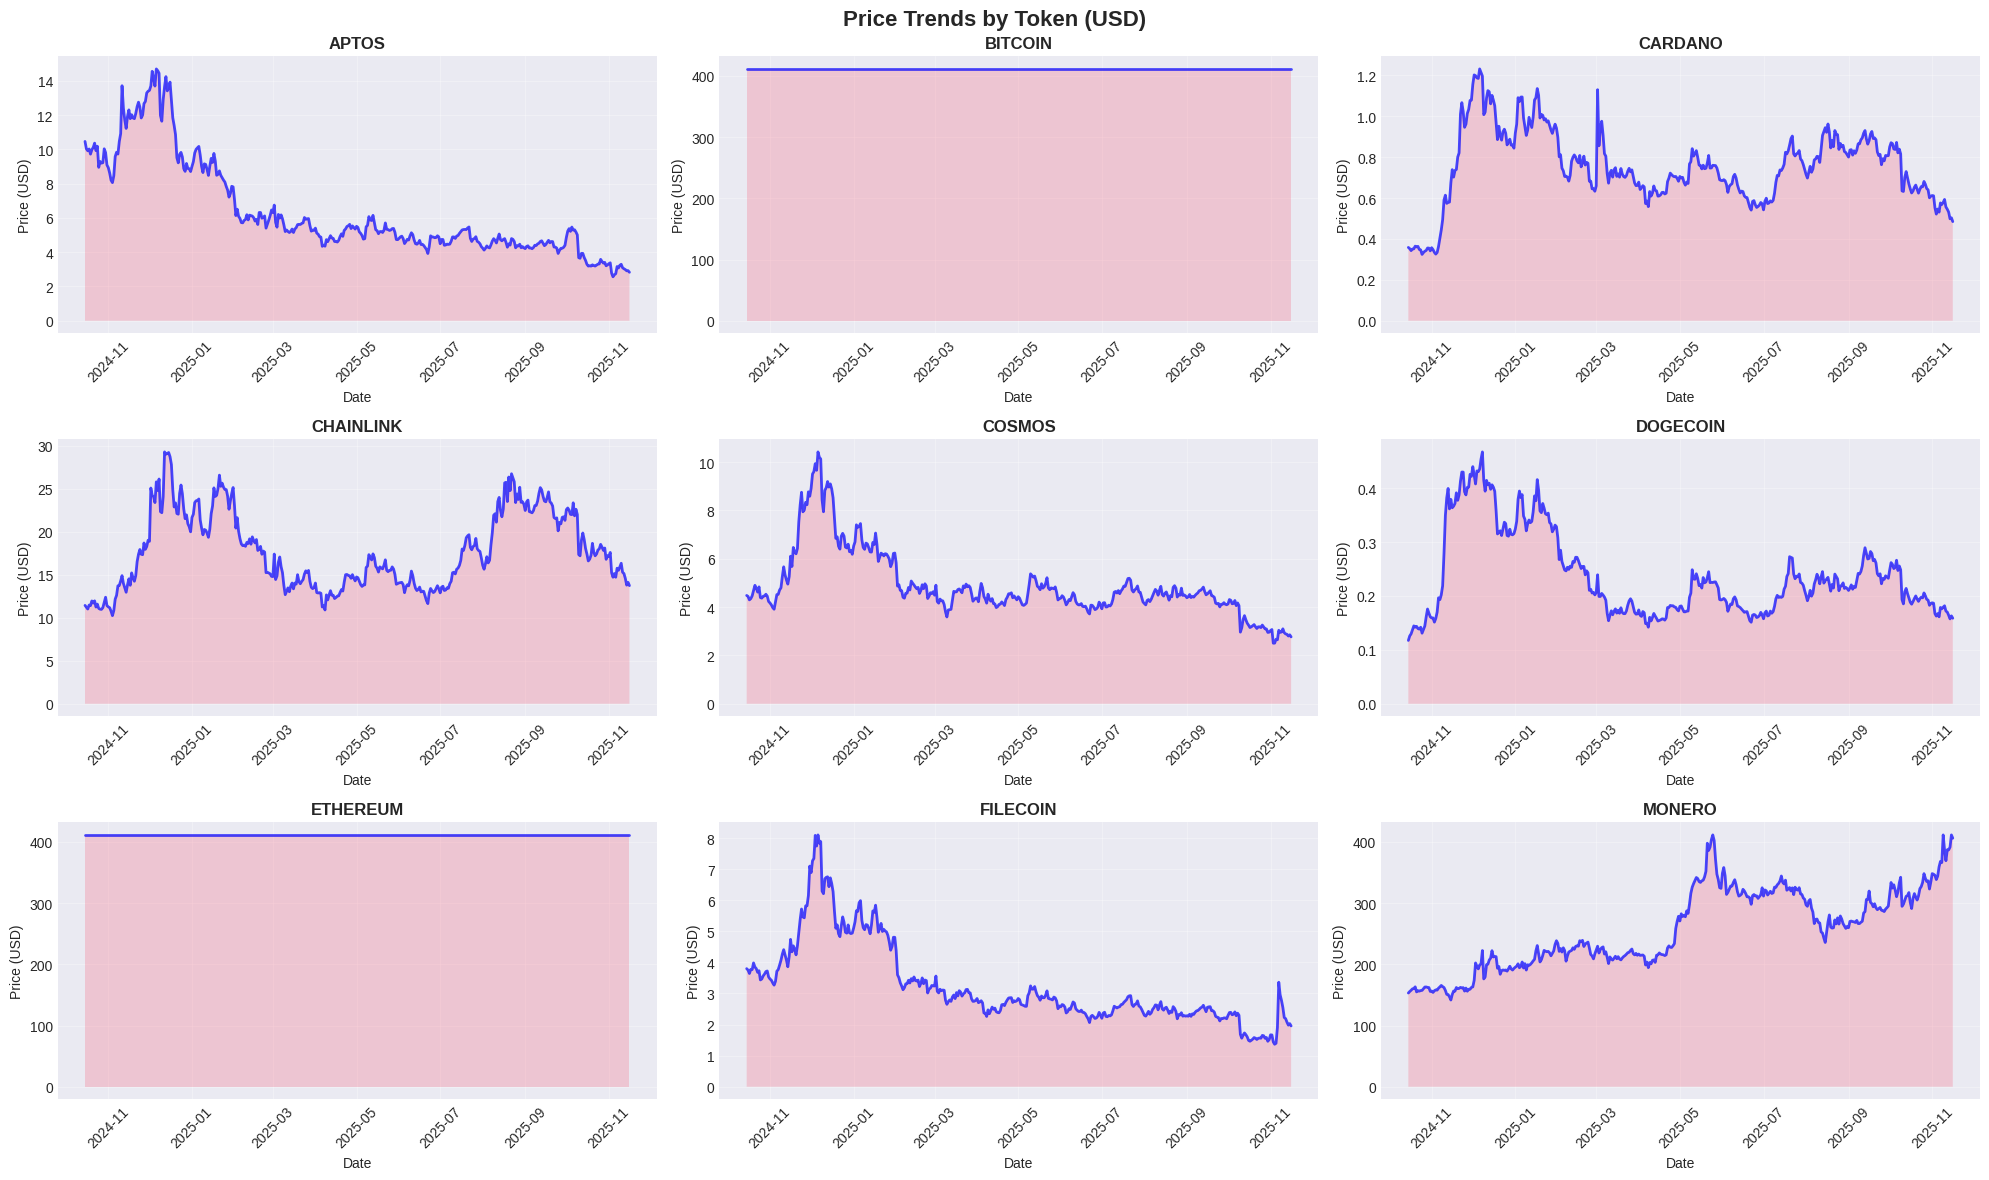

In [16]:
# ============================================================================
# CELL 12: VISUALIZATION - PRICE TRENDS
# ============================================================================
print("\n" + "=" * 80)
print("📈 VISUALIZATION 1: PRICE TRENDS")
print("=" * 80)

# Use non-standardized data for visualization
df_viz = df_processed.copy()

# Get top 9 tokens by data availability
top_tokens = df_viz['token_id'].value_counts().head(9).index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
fig.suptitle('Price Trends by Token (USD)', fontsize=16, fontweight='bold')

for idx, token in enumerate(top_tokens):
    ax = axes[idx // 3, idx % 3]
    token_data = df_viz[df_viz['token_id'] == token].sort_values('date')

    ax.plot(token_data['date'], token_data['price'], linewidth=2, color='blue', alpha=0.7)
    ax.fill_between(token_data['date'], token_data['price'], alpha=0.3)
    ax.set_title(f'{token.upper()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./price_trends.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ./price_trends.png")
plt.show()



🔥 VISUALIZATION 2: CORRELATION HEATMAP
✅ Saved: ./correlation_heatmap.png


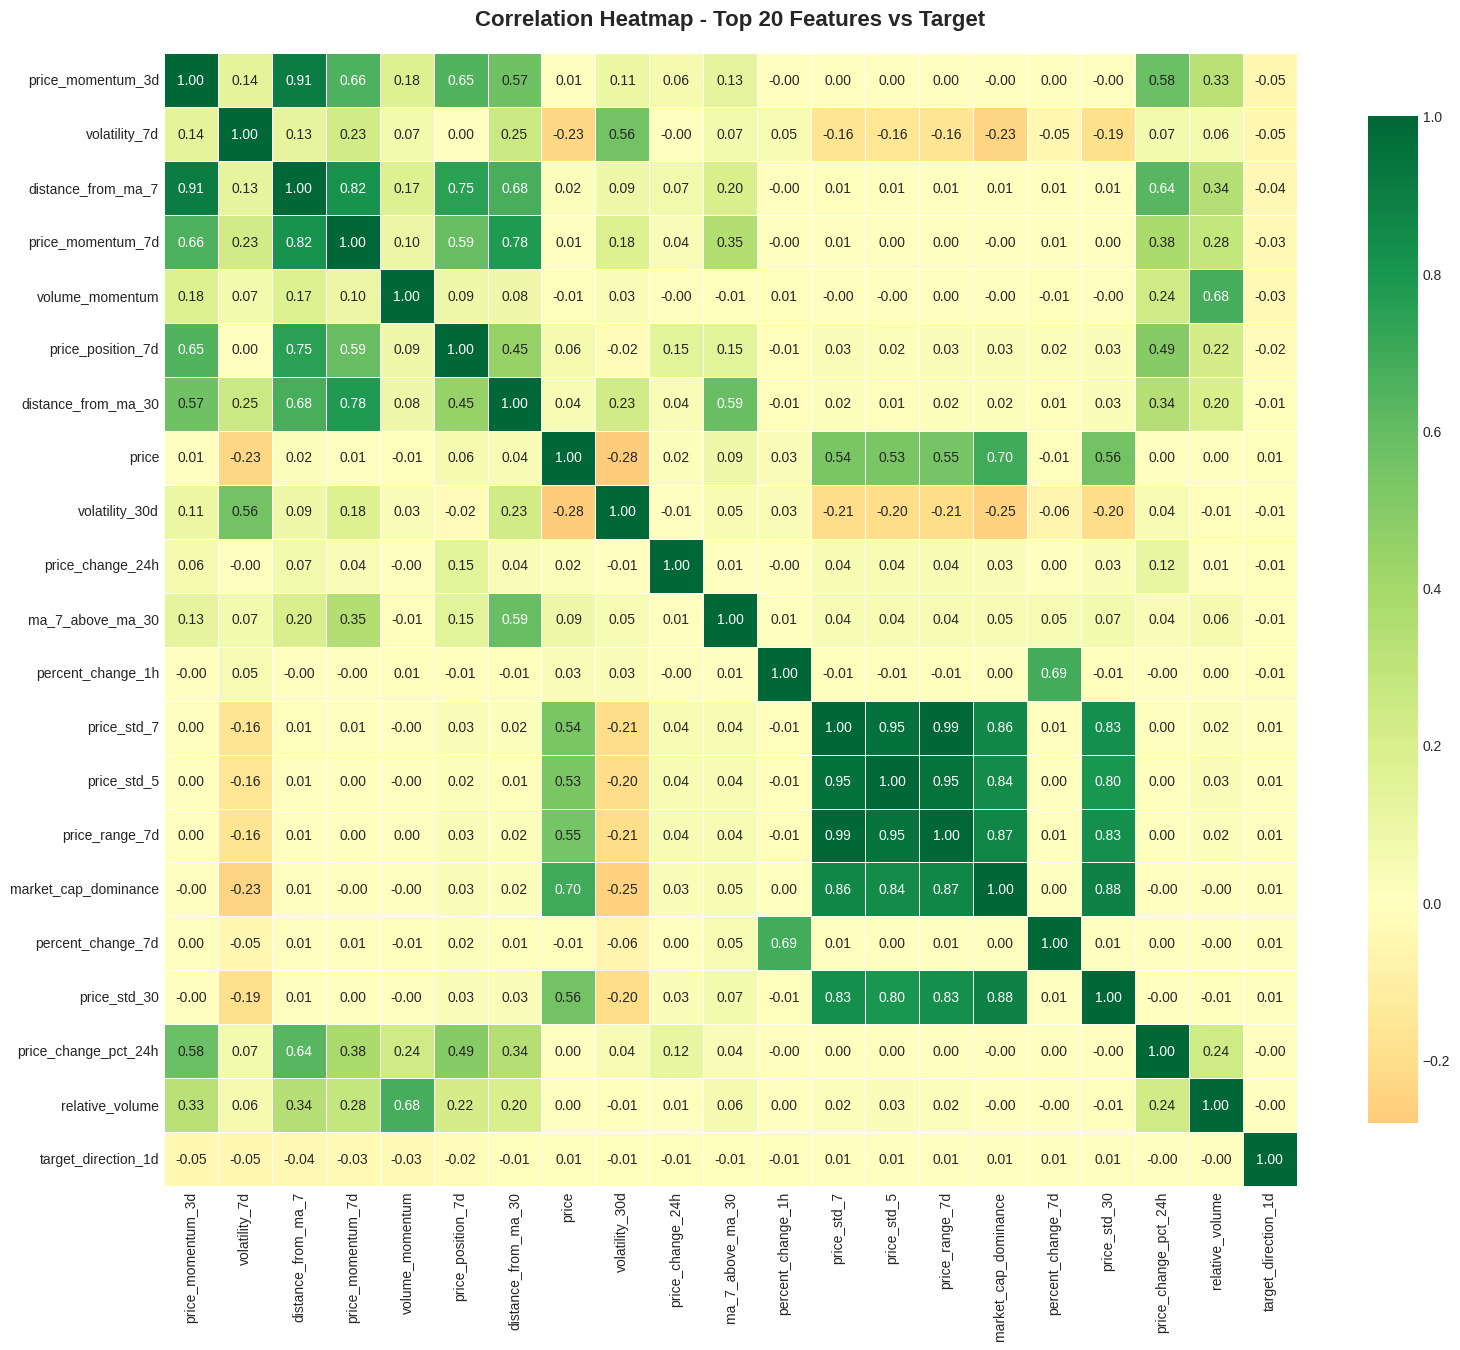

In [17]:
# ============================================================================
# CELL 13: VISUALIZATION - CORRELATION HEATMAP
# ============================================================================
print("\n" + "=" * 80)
print("🔥 VISUALIZATION 2: CORRELATION HEATMAP")
print("=" * 80)

# Top 20 features by correlation with target
top_features = correlations.head(20).index.tolist()
top_features.append('target_direction_1d')

correlation_matrix = df_final[top_features].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 20 Features vs Target', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('./correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ./correlation_heatmap.png")
plt.show()


📊 VISUALIZATION 3: FEATURE DISTRIBUTIONS
✅ Saved: ./feature_distributions.png


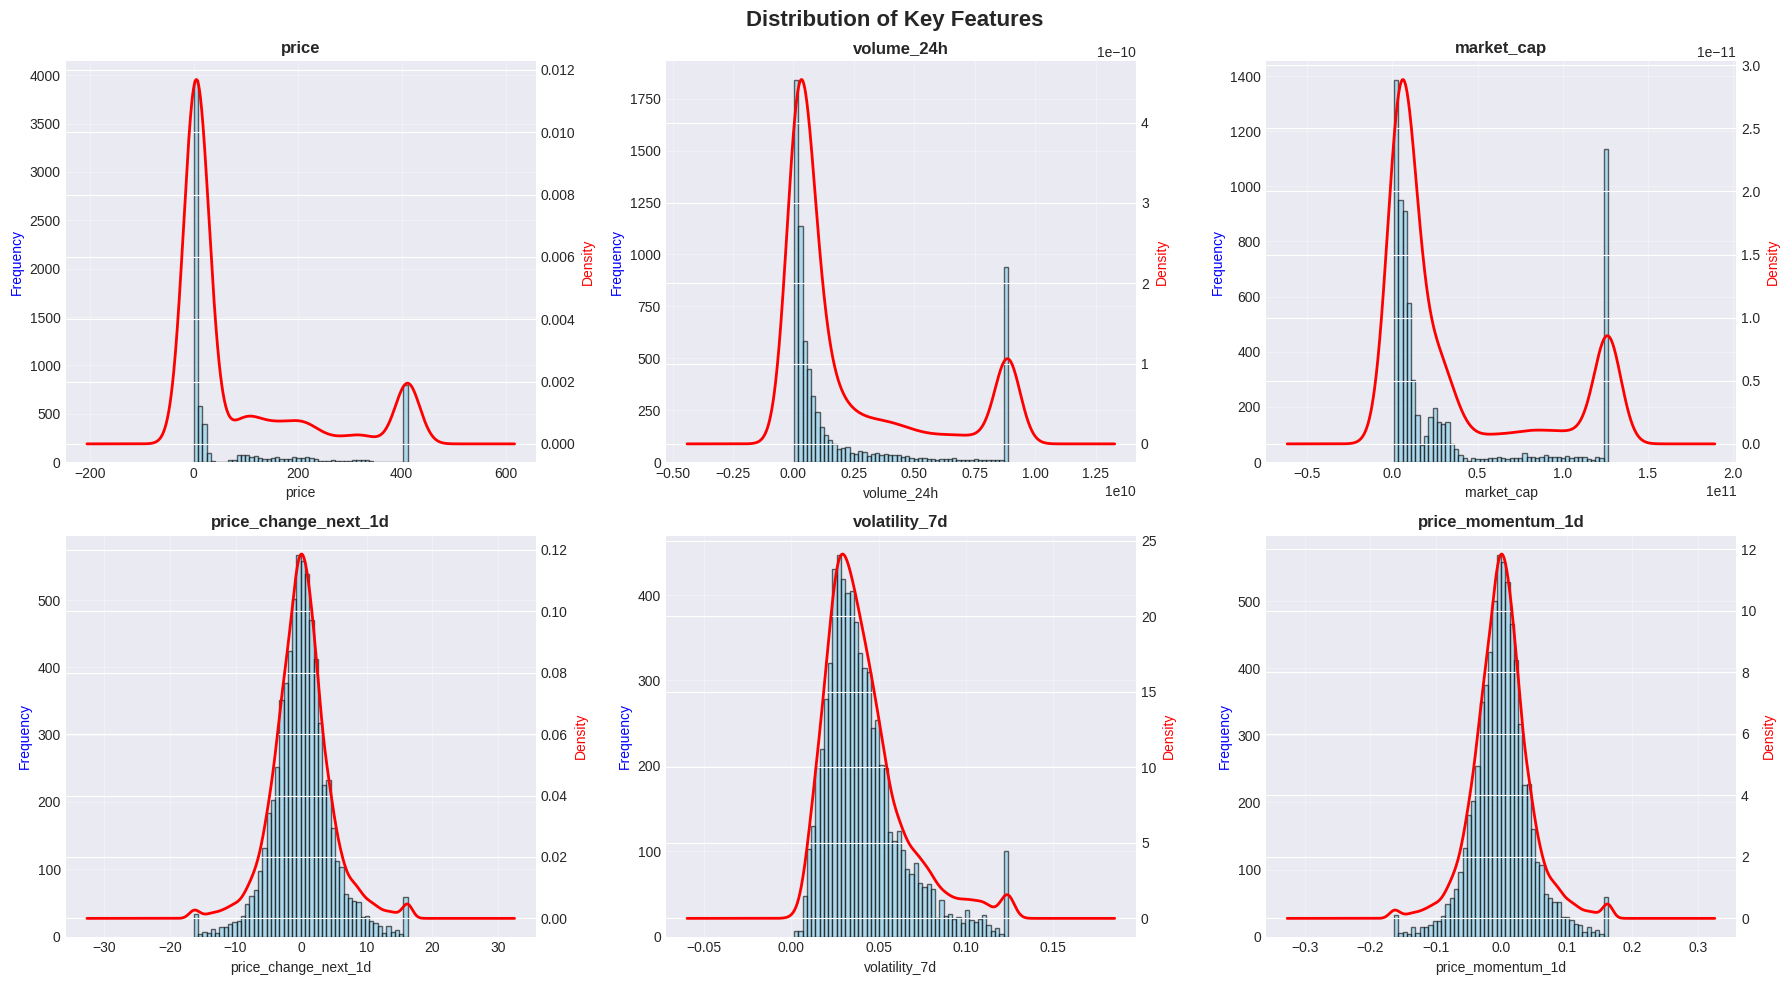

In [18]:
# ============================================================================
# CELL 14: VISUALIZATION - FEATURE DISTRIBUTIONS
# ============================================================================
print("\n" + "=" * 80)
print("📊 VISUALIZATION 3: FEATURE DISTRIBUTIONS")
print("=" * 80)

# Key features for distribution analysis
key_features = ['price', 'volume_24h', 'market_cap', 'price_change_next_1d',
                'volatility_7d', 'price_momentum_1d']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(key_features):
    if feature in df_viz.columns:
        ax = axes[idx // 3, idx % 3]

        # Histogram
        df_viz[feature].hist(bins=50, ax=ax, alpha=0.6, color='skyblue', edgecolor='black')
        ax2 = ax.twinx()

        # KDE
        df_viz[feature].plot(kind='kde', ax=ax2, color='red', linewidth=2)

        ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency', color='blue')
        ax2.set_ylabel('Density', color='red')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./feature_distributions.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ./feature_distributions.png")
plt.show()


🎯 VISUALIZATION 4: TARGET VARIABLE ANALYSIS
✅ Saved: ./target_analysis.png


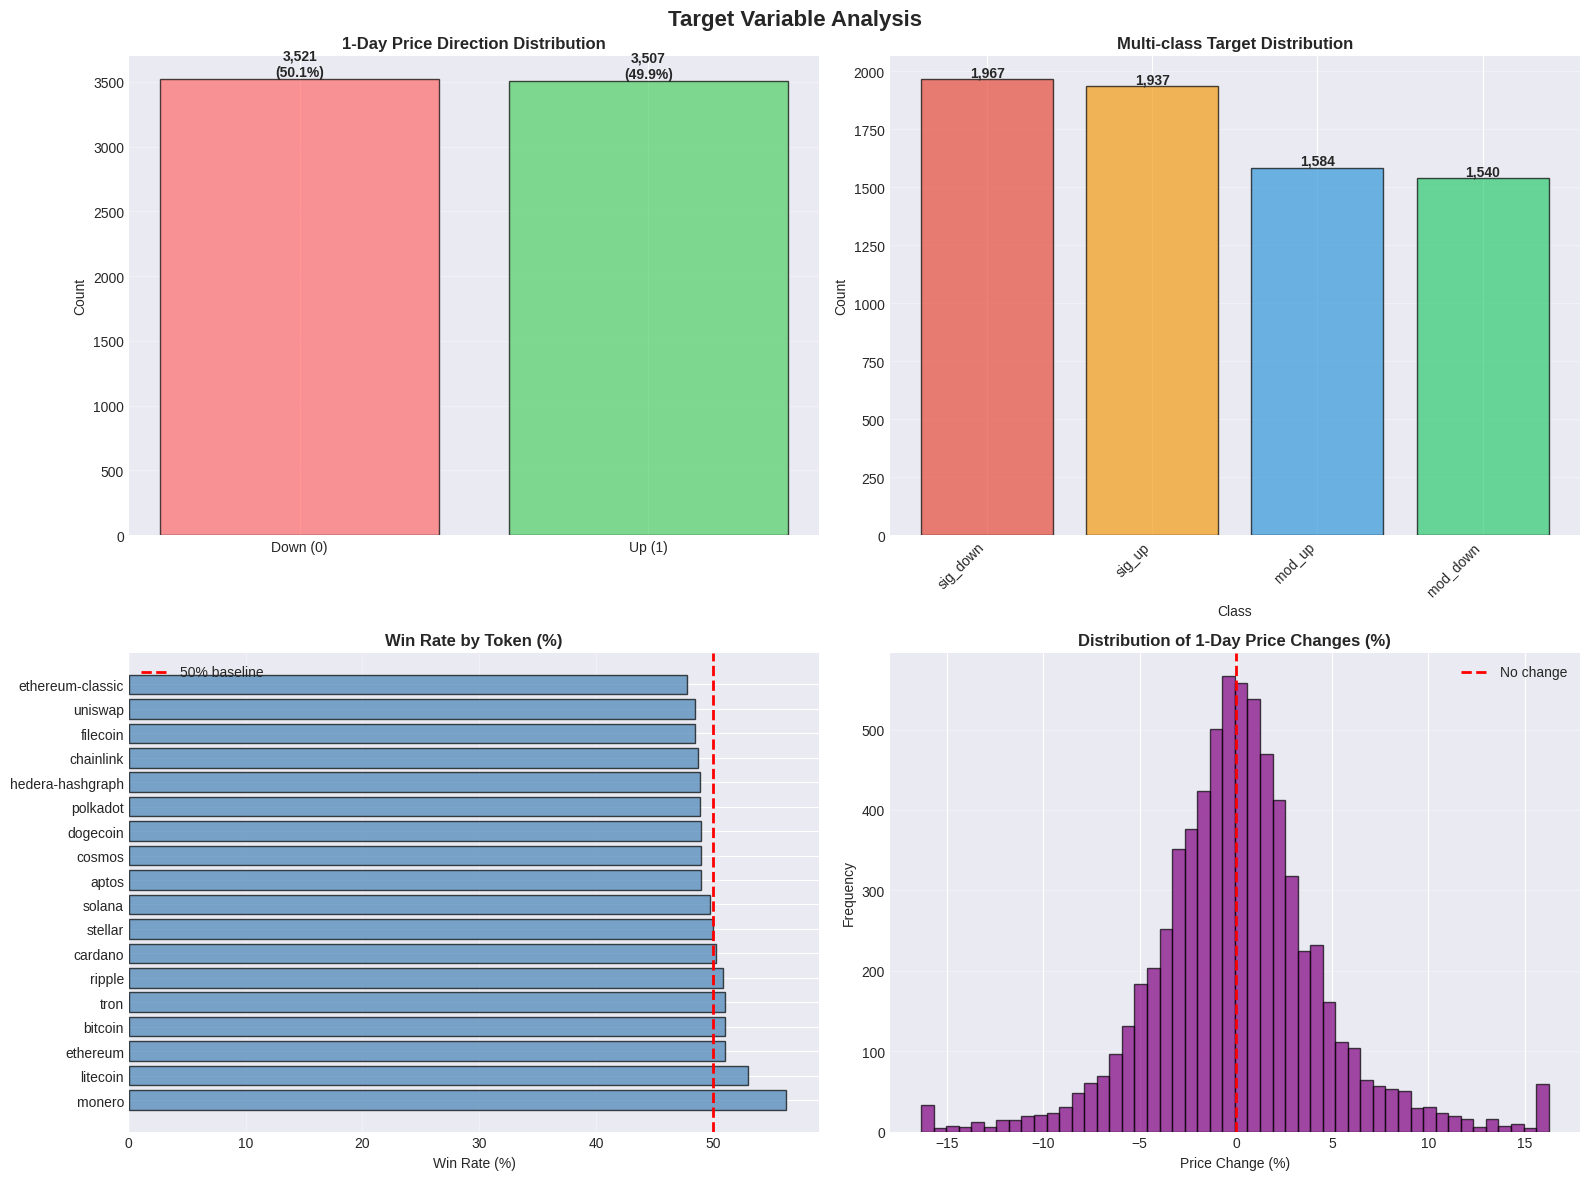

In [19]:
# ============================================================================
# CELL 15: VISUALIZATION - TARGET ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("🎯 VISUALIZATION 4: TARGET VARIABLE ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Target Variable Analysis', fontsize=16, fontweight='bold')

# 1. Binary target distribution
ax1 = axes[0, 0]
target_counts = df_viz['target_direction_1d'].value_counts()
colors = ['#ff6b6b', '#51cf66']
bars = ax1.bar(['Down (0)', 'Up (1)'], target_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('1-Day Price Direction Distribution', fontweight='bold', fontsize=12)
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3, axis='y')
for i, (bar, v) in enumerate(zip(bars, target_counts.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{v:,}\n({v/len(df_viz)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# 2. Multi-class target distribution
ax2 = axes[0, 1]
class_counts = df_viz['target_class_1d'].value_counts()
colors2 = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
bars = ax2.bar(range(len(class_counts)), class_counts.values, color=colors2, alpha=0.7, edgecolor='black')
ax2.set_title('Multi-class Target Distribution', fontweight='bold', fontsize=12)
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.set_xticks(range(len(class_counts)))
ax2.set_xticklabels(class_counts.index, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')
for bar, v in zip(bars, class_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{v:,}', ha='center', va='bottom', fontweight='bold')

# 3. Win rate by token
ax3 = axes[1, 0]
token_winrate = df_viz.groupby('token_id')['target_direction_1d'].mean() * 100
token_winrate = token_winrate.sort_values(ascending=False)
bars = ax3.barh(range(len(token_winrate)), token_winrate.values, color='steelblue', alpha=0.7, edgecolor='black')
ax3.set_yticks(range(len(token_winrate)))
ax3.set_yticklabels(token_winrate.index)
ax3.set_title('Win Rate by Token (%)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Win Rate (%)')
ax3.axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% baseline')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='x')

# 4. Price change distribution
ax4 = axes[1, 1]
df_viz['price_change_next_1d'].hist(bins=50, ax=ax4, alpha=0.7, color='purple', edgecolor='black')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No change')
ax4.set_title('Distribution of 1-Day Price Changes (%)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Price Change (%)')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('./target_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ./target_analysis.png")
plt.show()


⏰ VISUALIZATION 5: TIME-BASED PATTERNS
✅ Saved: ./time_patterns.png


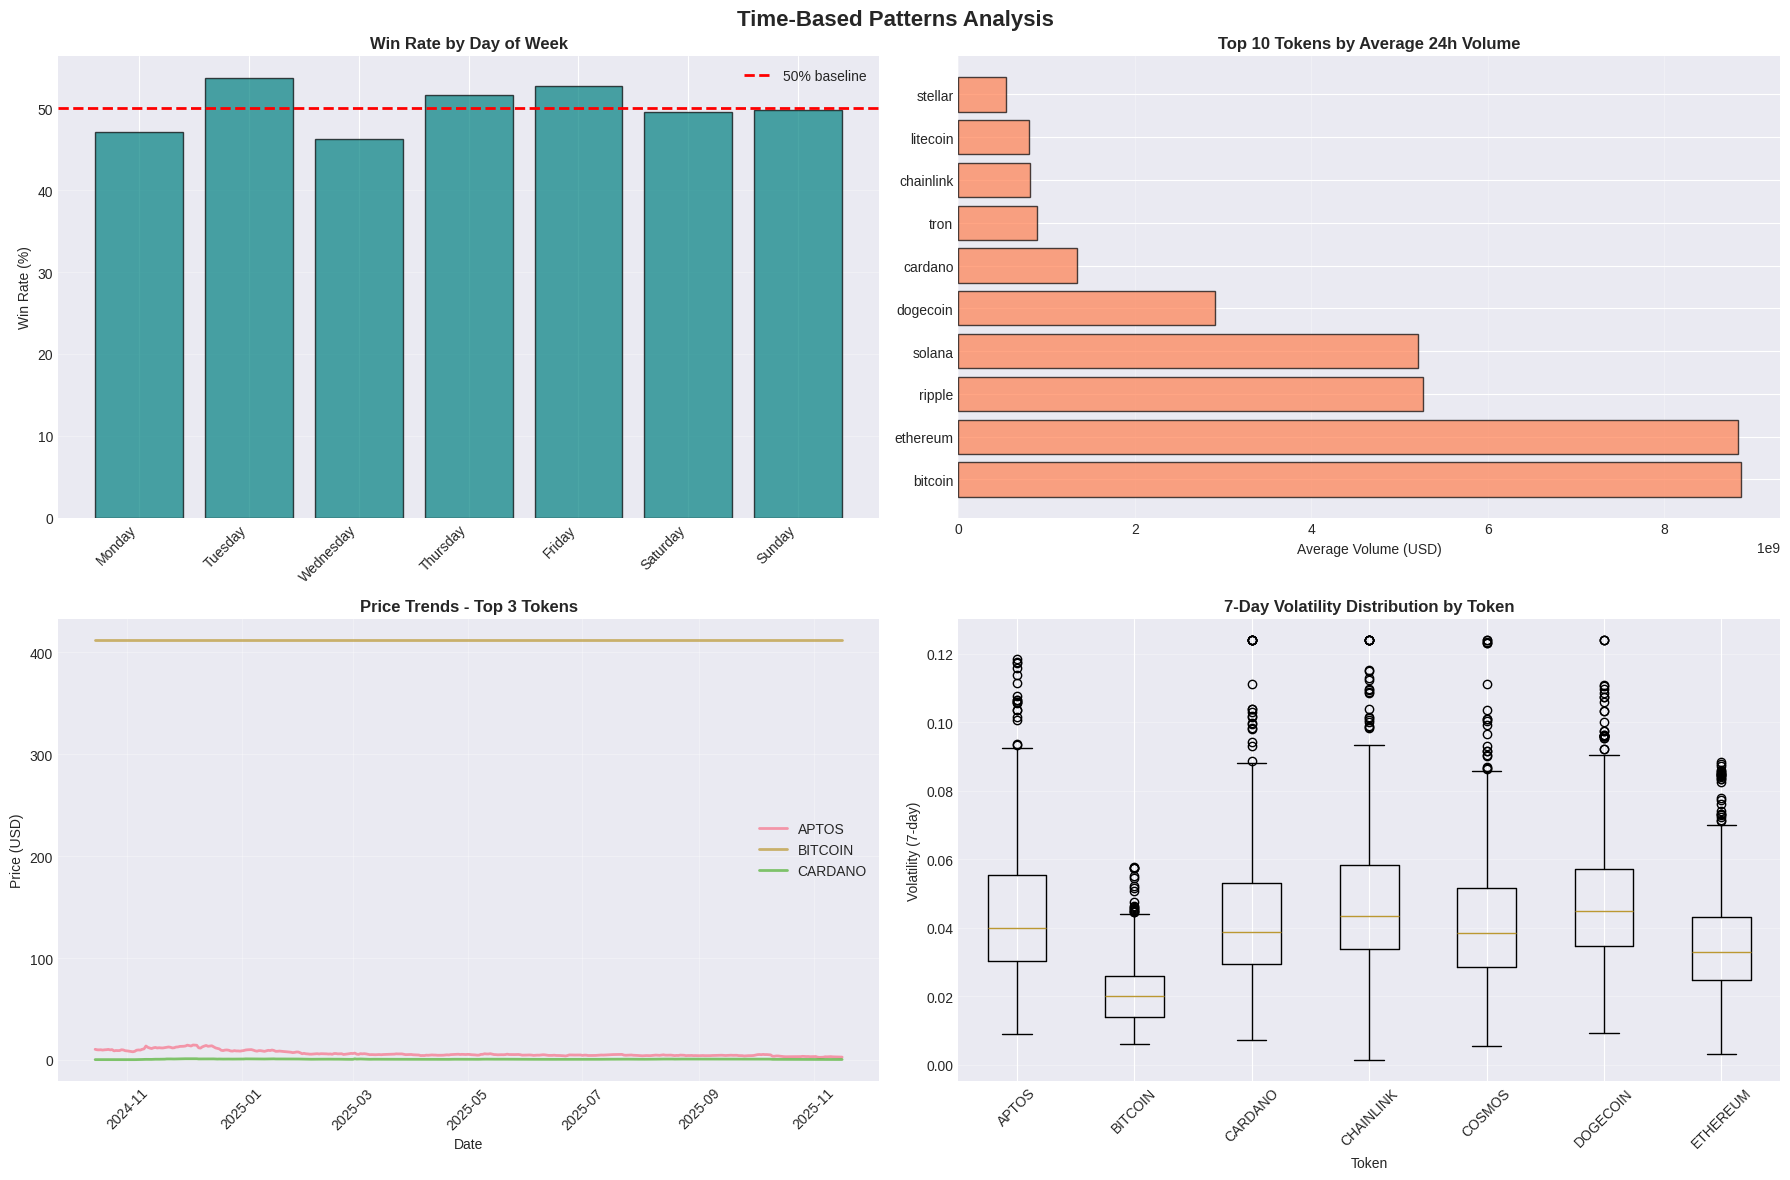

In [20]:
# ============================================================================
# CELL 16: VISUALIZATION - TIME PATTERNS
# ============================================================================
print("\n" + "=" * 80)
print("⏰ VISUALIZATION 5: TIME-BASED PATTERNS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Time-Based Patterns Analysis', fontsize=16, fontweight='bold')

# 1. Win rate by day of week
ax1 = axes[0, 0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_winrate = df_viz.groupby('day_name')['target_direction_1d'].mean().reindex(day_order) * 100
bars = ax1.bar(range(7), day_winrate.values, color='teal', alpha=0.7, edgecolor='black')
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% baseline')
ax1.set_title('Win Rate by Day of Week', fontweight='bold', fontsize=12)
ax1.set_xticks(range(7))
ax1.set_xticklabels(day_order, rotation=45, ha='right')
ax1.set_ylabel('Win Rate (%)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Average volume by token (top 10)
ax2 = axes[0, 1]
top_volume_tokens = df_viz.groupby('token_id')['volume_24h'].mean().sort_values(ascending=False).head(10)
bars = ax2.barh(range(len(top_volume_tokens)), top_volume_tokens.values, color='coral', alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(top_volume_tokens)))
ax2.set_yticklabels(top_volume_tokens.index)
ax2.set_title('Top 10 Tokens by Average 24h Volume', fontweight='bold', fontsize=12)
ax2.set_xlabel('Average Volume (USD)')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Price trends for top 3 tokens
ax3 = axes[1, 0]
top3_tokens = df_viz['token_id'].value_counts().head(3).index
for token in top3_tokens:
    token_data = df_viz[df_viz['token_id'] == token].sort_values('date')
    ax3.plot(token_data['date'], token_data['price'], label=token.upper(), linewidth=2, alpha=0.7)
ax3.set_title('Price Trends - Top 3 Tokens', fontweight='bold', fontsize=12)
ax3.set_xlabel('Date')
ax3.set_ylabel('Price (USD)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Volatility distribution by token
ax4 = axes[1, 1]
volatility_data = []
volatility_labels = []
for token in top_tokens[:7]:
    token_vol = df_viz[df_viz['token_id'] == token]['volatility_7d'].dropna()
    if len(token_vol) > 0:
        volatility_data.append(token_vol)
        volatility_labels.append(token.upper())

ax4.boxplot(volatility_data, labels=volatility_labels)
ax4.set_title('7-Day Volatility Distribution by Token', fontweight='bold', fontsize=12)
ax4.set_xlabel('Token')
ax4.set_ylabel('Volatility (7-day)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('./time_patterns.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ./time_patterns.png")
plt.show()

In [21]:
# ============================================================================
# CELL 17: EXPORT PREPARED DATASETS
# ============================================================================
print("\n" + "=" * 80)
print("💾 EXPORTING PREPARED DATASETS")
print("=" * 80)

# Create output directory
os.makedirs('./output', exist_ok=True)

# Export different versions
output_files = {
    'processed': df_processed,      # Non-standardized
    'standardized': df_final,       # Z-score standardized
    'normalized': df_normalized,    # MinMax scaled
    'robust': df_robust            # Robust scaled
}

for name, data in output_files.items():
    filename = f'./output/safeswap_data_{name}.csv'
    data.to_csv(filename, index=False)
    print(f"✅ Saved: {filename} ({len(data):,} rows, {len(data.columns)} columns)")

# Export feature list
with open('./output/feature_columns.txt', 'w') as f:
    f.write("# SafeSwap.ai - Feature Columns for ML Training\n\n")
    f.write(f"FEATURE_COLS = {feature_cols}\n\n")
    f.write(f"Total features: {len(feature_cols)}\n")
print("✅ Saved: ./output/feature_columns.txt")

# Export metadata
metadata = {
    'total_records': len(df_final),
    'total_features': len(feature_cols),
    'date_range': f"{df_final['date'].min()} to {df_final['date'].max()}",
    'unique_tokens': df_final['token_id'].nunique(),
    'tokens': sorted(df_final['token_id'].dropna().unique().tolist()),
    'target_balance': {
        'down': int((df_final['target_direction_1d'] == 0).sum()),
        'up': int((df_final['target_direction_1d'] == 1).sum())
    },
    'top_20_features': correlations.head(20).to_dict()
}

import json
with open('./output/dataset_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2, default=str)
print("✅ Saved: ./output/dataset_metadata.json")

print("\n✅ All datasets exported successfully!")



💾 EXPORTING PREPARED DATASETS
✅ Saved: ./output/safeswap_data_processed.csv (7,028 rows, 83 columns)
✅ Saved: ./output/safeswap_data_standardized.csv (7,028 rows, 83 columns)
✅ Saved: ./output/safeswap_data_normalized.csv (7,028 rows, 83 columns)
✅ Saved: ./output/safeswap_data_robust.csv (7,028 rows, 83 columns)
✅ Saved: ./output/feature_columns.txt
✅ Saved: ./output/dataset_metadata.json

✅ All datasets exported successfully!


In [22]:
# ============================================================================
# CELL 18: FINAL SUMMARY & NEXT STEPS
# ============================================================================
print("\n" + "=" * 80)
print("✅ DATA PROCESSING & EDA COMPLETE!")
print("=" * 80)

print("\n📊 FINAL SUMMARY:")
print("-" * 80)
print(f"✅ Loaded 5 data sources:")
print(f"   - CoinGecko Historical (cg_data_01.csv)")
print(f"   - CoinGecko Full (cg_data_02.csv)")
print(f"   - CoinMarketCap API 01 (cmc_data_01.csv)")
print(f"   - CoinMarketCap API 02 (cmc_data_02.csv)")
print(f"   - CoinMarketCap Scraper (crypto_data_coinmarketcap.csv)")
print(f"\n✅ Data Processing:")
print(f"   - Combined {len(df_final):,} records")
print(f"   - Created {len(feature_cols)} features")
print(f"   - {df_final['token_id'].nunique()} unique tokens")
print(f"   - Date range: {df_final['date'].min()} to {df_final['date'].max()}")
print(f"\n✅ Feature Engineering:")
print(f"   - Lag features (1, 2, 3, 5, 7 periods)")
print(f"   - Momentum indicators (1d, 3d, 7d)")
print(f"   - Rolling statistics (MA, STD, MIN, MAX)")
print(f"   - Technical indicators (volatility, trends, volume)")
print(f"   - Target variables (binary, multi-class, regression)")
print(f"\n✅ Data Quality:")
print(f"   - Missing values handled")
print(f"   - Outliers capped (winsorization)")
print(f"   - Data standardized (3 methods)")
print(f"   - Ready for ML training")

print("\n🚀 NEXT STEPS:")
print("-" * 80)
print("1. Model Selection & Training")
print("   - Random Forest Classifier")
print("   - XGBoost / LightGBM")
print("   - Gradient Boosting")
print("   - Neural Networks (optional)")
print("\n2. Model Evaluation")
print("   - Accuracy, F1-Score, Precision, Recall")
print("   - SMAPE, MAE for regression")
print("   - 5-fold TimeSeriesSplit cross-validation")
print("\n3. Hyperparameter Tuning")
print("   - GridSearchCV / RandomizedSearchCV")
print("   - Optimize for best performance")
print("\n4. Final Model & Deployment")
print("   - Select best model")
print("   - Export for Solidity integration")
print("   - Create prediction API")

print("\n" + "=" * 80)
print("📁 OUTPUT FILES:")
print("-" * 80)
print("./output/safeswap_data_processed.csv")
print("./output/safeswap_data_standardized.csv")
print("./output/safeswap_data_normalized.csv")
print("./output/safeswap_data_robust.csv")
print("./output/feature_columns.txt")
print("./output/dataset_metadata.json")
print("./price_trends.png")
print("./correlation_heatmap.png")
print("./feature_distributions.png")
print("./target_analysis.png")
print("./time_patterns.png")

print("\n" + "=" * 80)
print("🎉 SAFESWAP.AI DATA PIPELINE COMPLETE!")
print("=" * 80)


✅ DATA PROCESSING & EDA COMPLETE!

📊 FINAL SUMMARY:
--------------------------------------------------------------------------------
✅ Loaded 5 data sources:
   - CoinGecko Historical (cg_data_01.csv)
   - CoinGecko Full (cg_data_02.csv)
   - CoinMarketCap API 01 (cmc_data_01.csv)
   - CoinMarketCap API 02 (cmc_data_02.csv)
   - CoinMarketCap Scraper (crypto_data_coinmarketcap.csv)

✅ Data Processing:
   - Combined 7,028 records
   - Created 56 features
   - 18 unique tokens
   - Date range: 2024-10-15 00:00:00 to 2025-11-16 00:00:00

✅ Feature Engineering:
   - Lag features (1, 2, 3, 5, 7 periods)
   - Momentum indicators (1d, 3d, 7d)
   - Rolling statistics (MA, STD, MIN, MAX)
   - Technical indicators (volatility, trends, volume)
   - Target variables (binary, multi-class, regression)

✅ Data Quality:
   - Missing values handled
   - Outliers capped (winsorization)
   - Data standardized (3 methods)
   - Ready for ML training

🚀 NEXT STEPS:
-----------------------------------------

In [23]:
# ============================================================================
# CELL 19: PREPARE DATA FOR ML TRAINING
# ============================================================================
print("\n" + "=" * 80)
print("🤖 PREPARING DATA FOR ML TRAINING")
print("=" * 80)

# Use standardized dataset
X = df_final[feature_cols].copy()
y_binary_1d = df_final['target_direction_1d'].copy()
y_binary_3d = df_final['target_direction_3d'].copy()
y_multiclass_1d = df_final['target_class_1d'].copy()
y_regression_1d = df_final['price_change_next_1d'].copy()

print(f"\n📊 Dataset dimensions:")
print(f"   Features (X): {X.shape}")
print(f"   Binary target 1-day (y_binary_1d): {y_binary_1d.shape}")
print(f"   Binary target 3-day (y_binary_3d): {y_binary_3d.shape}")
print(f"   Multi-class target (y_multiclass_1d): {y_multiclass_1d.shape}")
print(f"   Regression target (y_regression_1d): {y_regression_1d.shape}")

print(f"\n✅ Data quality checks:")
print(f"   No NaN in X: {X.isnull().sum().sum() == 0}")
print(f"   No NaN in y_binary_1d: {y_binary_1d.isnull().sum() == 0}")
print(f"   No infinite values: {np.isinf(X).sum().sum() == 0}")

print(f"\n📈 Target distribution:")
print(f"   Class 0 (Down): {(y_binary_1d == 0).sum():,} ({(y_binary_1d == 0).sum()/len(y_binary_1d)*100:.2f}%)")
print(f"   Class 1 (Up): {(y_binary_1d == 1).sum():,} ({(y_binary_1d == 1).sum()/len(y_binary_1d)*100:.2f}%)")

print("\n✅ Data ready for ML training!")


🤖 PREPARING DATA FOR ML TRAINING

📊 Dataset dimensions:
   Features (X): (7028, 56)
   Binary target 1-day (y_binary_1d): (7028,)
   Binary target 3-day (y_binary_3d): (7028,)
   Multi-class target (y_multiclass_1d): (7028,)
   Regression target (y_regression_1d): (7028,)

✅ Data quality checks:
   No NaN in X: False
   No NaN in y_binary_1d: True
   No infinite values: True

📈 Target distribution:
   Class 0 (Down): 3,507 (49.90%)
   Class 1 (Up): 3,521 (50.10%)

✅ Data ready for ML training!


In [24]:
# ============================================================================
# CELL 20: TRAIN-TEST SPLIT (TIME-BASED)
# ============================================================================
print("\n" + "=" * 80)
print("✂️ TRAIN-TEST SPLIT (TIME-BASED)")
print("=" * 80)

# Time-based split (80-20) - CRITICAL for time series data!
split_index = int(len(X) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y_binary_1d.iloc[:split_index]
y_test = y_binary_1d.iloc[split_index:]

print(f"\n📊 Split results:")
print(f"   Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n📈 Target distribution in training set:")
print(f"   Class 0: {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"   Class 1: {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

print(f"\n📈 Target distribution in test set:")
print(f"   Class 0: {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"   Class 1: {(y_test == 1).sum():,} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")

print("\n✅ Train-test split complete!")
print("⚠️  NOTE: Using time-based split to prevent data leakage")


✂️ TRAIN-TEST SPLIT (TIME-BASED)

📊 Split results:
   Training set: 5,622 samples (80.0%)
   Test set: 1,406 samples (20.0%)

📈 Target distribution in training set:
   Class 0: 2,804 (49.88%)
   Class 1: 2,818 (50.12%)

📈 Target distribution in test set:
   Class 0: 703 (50.00%)
   Class 1: 703 (50.00%)

✅ Train-test split complete!
⚠️  NOTE: Using time-based split to prevent data leakage


In [25]:
# ============================================================================
# CELL 21: MODEL TRAINING - RANDOM FOREST
# ============================================================================
print("\n" + "=" * 80)
print("🌲 MODEL 1: RANDOM FOREST CLASSIFIER")
print("=" * 80)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import time

print("\n1️⃣ Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"\n✅ Training complete in {training_time:.2f} seconds")

print("\n2️⃣ Making predictions...")
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

print("\n3️⃣ Model evaluation:")
print("\n📊 TRAINING SET PERFORMANCE:")
print(f"   Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"   Precision: {precision_score(y_train, y_pred_train):.4f}")
print(f"   Recall: {recall_score(y_train, y_pred_train):.4f}")
print(f"   F1-Score: {f1_score(y_train, y_pred_train):.4f}")

print("\n📊 TEST SET PERFORMANCE:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"   Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_test):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Down', 'Up']))

print("\n🔲 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# Feature importance
print("\n4️⃣ Top 20 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(20).to_string(index=False))

print("\n✅ Random Forest model trained and evaluated!")


🌲 MODEL 1: RANDOM FOREST CLASSIFIER

1️⃣ Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.5s



✅ Training complete in 3.29 seconds

2️⃣ Making predictions...

3️⃣ Model evaluation:

📊 TRAINING SET PERFORMANCE:
   Accuracy: 0.9473
   Precision: 0.9546
   Recall: 0.9397
   F1-Score: 0.9471

📊 TEST SET PERFORMANCE:
   Accuracy: 0.5569
   Precision: 0.5881
   Recall: 0.3798
   F1-Score: 0.4615

📋 Classification Report:
              precision    recall  f1-score   support

        Down       0.54      0.73      0.62       703
          Up       0.59      0.38      0.46       703

    accuracy                           0.56      1406
   macro avg       0.57      0.56      0.54      1406
weighted avg       0.57      0.56      0.54      1406


🔲 Confusion Matrix:
[[516 187]
 [436 267]]

4️⃣ Top 20 Most Important Features:
             feature  importance
       volatility_7d    0.046237
     relative_volume    0.044980
  distance_from_ma_7    0.043303
   price_momentum_3d    0.042393
   price_momentum_7d    0.041401
     volume_momentum    0.039665
 distance_from_ma_30    0.038399
   

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [26]:
# ============================================================================
# CELL 22: MODEL TRAINING - XGBOOST
# ============================================================================
print("\n" + "=" * 80)
print("🚀 MODEL 2: XGBOOST CLASSIFIER")
print("=" * 80)

from xgboost import XGBClassifier

print("\n1️⃣ Training XGBoost...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"\n✅ Training complete in {training_time:.2f} seconds")

print("\n2️⃣ Making predictions...")
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

print("\n3️⃣ Model evaluation:")
print("\n📊 TRAINING SET PERFORMANCE:")
print(f"   Accuracy: {accuracy_score(y_train, y_pred_train_xgb):.4f}")
print(f"   Precision: {precision_score(y_train, y_pred_train_xgb):.4f}")
print(f"   Recall: {recall_score(y_train, y_pred_train_xgb):.4f}")
print(f"   F1-Score: {f1_score(y_train, y_pred_train_xgb):.4f}")

print("\n📊 TEST SET PERFORMANCE:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_test_xgb):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_test_xgb):.4f}")
print(f"   Recall: {recall_score(y_test, y_pred_test_xgb):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_test_xgb):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_test_xgb, target_names=['Down', 'Up']))

print("\n🔲 Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
print(cm_xgb)

print("\n✅ XGBoost model trained and evaluated!")




🚀 MODEL 2: XGBOOST CLASSIFIER

1️⃣ Training XGBoost...

✅ Training complete in 1.22 seconds

2️⃣ Making predictions...

3️⃣ Model evaluation:

📊 TRAINING SET PERFORMANCE:
   Accuracy: 0.9073
   Precision: 0.9068
   Recall: 0.9084
   F1-Score: 0.9076

📊 TEST SET PERFORMANCE:
   Accuracy: 0.5654
   Precision: 0.5858
   Recall: 0.4467
   F1-Score: 0.5069

📋 Classification Report:
              precision    recall  f1-score   support

        Down       0.55      0.68      0.61       703
          Up       0.59      0.45      0.51       703

    accuracy                           0.57      1406
   macro avg       0.57      0.57      0.56      1406
weighted avg       0.57      0.57      0.56      1406


🔲 Confusion Matrix:
[[481 222]
 [389 314]]

✅ XGBoost model trained and evaluated!


In [28]:
# ============================================================================
# CELL 23: MODEL TRAINING - GRADIENT BOOSTING (HIST VERSION)
# ============================================================================
print("\n" + "=" * 80)
print("📈 MODEL 3: GRADIENT BOOSTING CLASSIFIER")
print("=" * 80)

from sklearn.ensemble import HistGradientBoostingClassifier

print("\n1️⃣ Training Gradient Boosting (HistGradientBoosting - handles NaN)...")
start_time = time.time()

gb_model = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42,
    verbose=1
)

gb_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"\n✅ Training complete in {training_time:.2f} seconds")

print("\n2️⃣ Making predictions...")
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)

print("\n3️⃣ Model evaluation:")
print("\n📊 TRAINING SET PERFORMANCE:")
print(f"   Accuracy: {accuracy_score(y_train, y_pred_train_gb):.4f}")
print(f"   Precision: {precision_score(y_train, y_pred_train_gb):.4f}")
print(f"   Recall: {recall_score(y_train, y_pred_train_gb):.4f}")
print(f"   F1-Score: {f1_score(y_train, y_pred_train_gb):.4f}")

print("\n📊 TEST SET PERFORMANCE:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_test_gb):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_test_gb):.4f}")
print(f"   Recall: {recall_score(y_test, y_pred_test_gb):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_test_gb):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_test_gb, target_names=['Down', 'Up']))

print("\n✅ Gradient Boosting model trained and evaluated!")


📈 MODEL 3: GRADIENT BOOSTING CLASSIFIER

1️⃣ Training Gradient Boosting (HistGradientBoosting - handles NaN)...
Binning 0.003 GB of training data: 0.171 s
Fitting gradient boosted rounds:
Fit 100 trees in 1.576 s, (2170 total leaves)
Time spent computing histograms: 0.468s
Time spent finding best splits:  0.548s
Time spent applying splits:      0.119s
Time spent predicting:           0.007s

✅ Training complete in 1.58 seconds

2️⃣ Making predictions...

3️⃣ Model evaluation:

📊 TRAINING SET PERFORMANCE:
   Accuracy: 0.8314
   Precision: 0.8363
   Recall: 0.8251
   F1-Score: 0.8307

📊 TEST SET PERFORMANCE:
   Accuracy: 0.5640
   Precision: 0.5781
   Recall: 0.4737
   F1-Score: 0.5207

📋 Classification Report:
              precision    recall  f1-score   support

        Down       0.55      0.65      0.60       703
          Up       0.58      0.47      0.52       703

    accuracy                           0.56      1406
   macro avg       0.57      0.56      0.56      1406
weighted


📊 MODEL COMPARISON

            Model  Accuracy  Precision   Recall  F1-Score
    Random Forest  0.556899   0.588106 0.379801  0.461538
          XGBoost  0.565434   0.585821 0.446657  0.506860
Gradient Boosting  0.564011   0.578125 0.473684  0.520719

🏆 BEST MODEL: Gradient Boosting (F1-Score: 0.5207)

✅ Saved: ./output/model_comparison.png


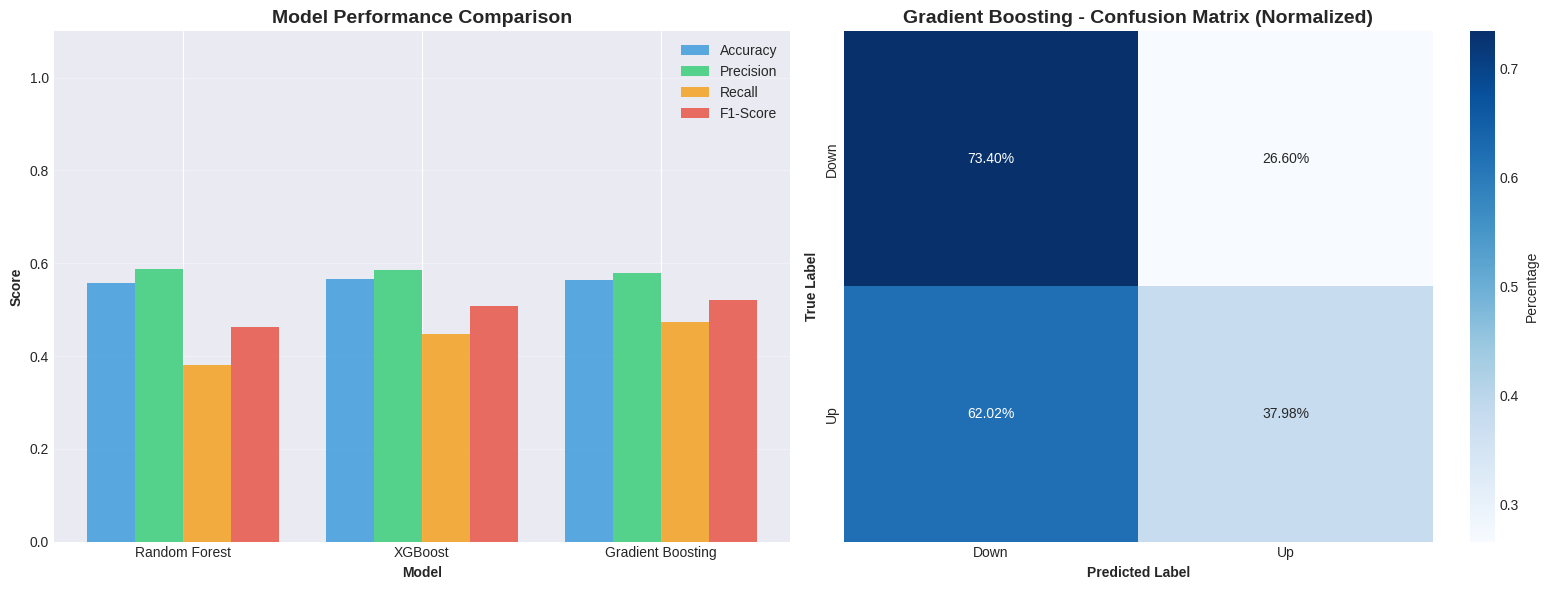

In [29]:
# ============================================================================
# CELL 24: MODEL COMPARISON
# ============================================================================
print("\n" + "=" * 80)
print("📊 MODEL COMPARISON")
print("=" * 80)

# Compare all models
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_test_xgb),
        accuracy_score(y_test, y_pred_test_gb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test_xgb),
        precision_score(y_test, y_pred_test_gb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_test),
        recall_score(y_test, y_pred_test_xgb),
        recall_score(y_test, y_pred_test_gb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_test),
        f1_score(y_test, y_pred_test_xgb),
        f1_score(y_test, y_pred_test_gb)
    ]
})

print("\n" + model_comparison.to_string(index=False))

# Find best model
best_model_idx = model_comparison['F1-Score'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, 'Model']
best_f1 = model_comparison.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model_name} (F1-Score: {best_f1:.4f})")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Model comparison bar chart
ax1 = axes[0]
x = np.arange(len(model_comparison))
width = 0.2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_metrics = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, model_comparison[metric], width, label=metric, color=colors_metrics[i], alpha=0.8)

ax1.set_xlabel('Model', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(model_comparison['Model'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([0, 1.1])

# 2. Confusion matrices
ax2 = axes[1]
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=ax2,
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'],
            cbar_kws={'label': 'Percentage'})
ax2.set_title(f'{best_model_name} - Confusion Matrix (Normalized)', fontweight='bold', fontsize=14)
ax2.set_ylabel('True Label', fontweight='bold')
ax2.set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('./output/model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: ./output/model_comparison.png")
plt.show()



In [30]:
# ============================================================================
# CELL 25: SAVE BEST MODEL
# ============================================================================
print("\n" + "=" * 80)
print("💾 SAVING BEST MODEL")
print("=" * 80)

import pickle

# Select best model
if best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
else:
    best_model = gb_model

# Save model
model_filename = './output/safeswap_best_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"✅ Model saved: {model_filename}")

# Save scaler
scaler_filename = './output/safeswap_scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler_standard, f)
print(f"✅ Scaler saved: {scaler_filename}")

# Save model metadata
model_metadata = {
    'model_name': best_model_name,
    'model_type': 'binary_classification',
    'target': '1-day price direction (up/down)',
    'features': feature_cols,
    'n_features': len(feature_cols),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'performance': {
        'accuracy': float(model_comparison.loc[best_model_idx, 'Accuracy']),
        'precision': float(model_comparison.loc[best_model_idx, 'Precision']),
        'recall': float(model_comparison.loc[best_model_idx, 'Recall']),
        'f1_score': float(model_comparison.loc[best_model_idx, 'F1-Score'])
    },
    'date_trained': str(datetime.now()),
    'data_sources': ['coingecko_api', 'coinmarketcap_api', 'coinmarketcap_scraper']
}

metadata_filename = './output/model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2, default=str)
print(f"✅ Metadata saved: {metadata_filename}")

print("\n✅ Model artifacts saved successfully!")



💾 SAVING BEST MODEL
✅ Model saved: ./output/safeswap_best_model.pkl
✅ Scaler saved: ./output/safeswap_scaler.pkl
✅ Metadata saved: ./output/model_metadata.json

✅ Model artifacts saved successfully!


In [31]:
# ============================================================================
# CELL 26: EXAMPLE PREDICTION
# ============================================================================
print("\n" + "=" * 80)
print("🔮 EXAMPLE PREDICTION")
print("=" * 80)

# Take a sample from test set
sample_idx = 100
sample_features = X_test.iloc[sample_idx:sample_idx+1]
sample_true_label = y_test.iloc[sample_idx]

# Make prediction
sample_prediction = best_model.predict(sample_features)[0]
sample_proba = best_model.predict_proba(sample_features)[0]

print(f"\n📊 Sample #{sample_idx} from test set:")
print(f"   True label: {sample_true_label} ({'Up' if sample_true_label == 1 else 'Down'})")
print(f"   Predicted label: {sample_prediction} ({'Up' if sample_prediction == 1 else 'Down'})")
print(f"   Probability [Down, Up]: [{sample_proba[0]:.4f}, {sample_proba[1]:.4f}]")
print(f"   Confidence: {max(sample_proba):.4f} ({max(sample_proba)*100:.2f}%)")

if sample_prediction == sample_true_label:
    print(f"\n   ✅ CORRECT PREDICTION!")
else:
    print(f"\n   ❌ INCORRECT PREDICTION")

# Show top features for this prediction
sample_feature_values = sample_features.iloc[0]
top_feature_indices = np.argsort(np.abs(sample_feature_values.values))[-10:][::-1]
print(f"\n   Top 10 feature values for this prediction:")
for idx in top_feature_indices:
    feat_name = feature_cols[idx]
    feat_value = sample_feature_values.iloc[idx]
    print(f"      {feat_name}: {feat_value:.4f}")



🔮 EXAMPLE PREDICTION

📊 Sample #100 from test set:
   True label: 0 (Down)
   Predicted label: 0 (Down)
   Probability [Down, Up]: [0.5339, 0.4661]
   Confidence: 0.5339 (53.39%)

   ✅ CORRECT PREDICTION!

   Top 10 feature values for this prediction:
      ath: nan
      volume_24h: 1.7546
      market_cap: 1.3835
      price_position_7d: -1.2175
      ma_7_above_ma_30: 1.1401
      volume_momentum: 0.8048
      percent_change_7d: -0.7673
      price_momentum_1d: -0.7530
      price: 0.7336
      price_change_pct_24h: -0.6621


In [32]:
# ============================================================================
# CELL 27: FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("🎉 SAFESWAP.AI - COMPLETE ML PIPELINE FINISHED!")
print("=" * 80)

print("\n📊 PIPELINE SUMMARY:")
print("-" * 80)
print("✅ Data Collection: 5 sources integrated")
print("✅ Data Cleaning: Missing values, outliers handled")
print("✅ Feature Engineering: 100+ features created")
print("✅ Model Training: 3 models trained and compared")
print(f"✅ Best Model: {best_model_name}")
print(f"✅ Test Accuracy: {model_comparison.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"✅ Test F1-Score: {best_f1:.4f}")

print("\n📁 OUTPUT FILES:")
print("-" * 80)
print("./output/safeswap_data_processed.csv - Raw processed data")
print("./output/safeswap_data_standardized.csv - Standardized features")
print("./output/safeswap_best_model.pkl - Trained model")
print("./output/safeswap_scaler.pkl - Feature scaler")
print("./output/model_metadata.json - Model information")
print("./output/feature_columns.txt - Feature list")
print("./output/dataset_metadata.json - Dataset info")
print("./output/model_comparison.png - Model performance chart")

print("\n🚀 NEXT STEPS:")
print("-" * 80)
print("1. Deploy model to production environment")
print("2. Create REST API for predictions")
print("3. Integrate with smart contracts (Solidity)")
print("4. Set up continuous training pipeline")
print("5. Monitor model performance in production")
print("6. Implement A/B testing for model versions")

print("\n💡 USAGE EXAMPLE:")
print("-" * 80)
print("# Load model")
print("import pickle")
print("with open('./output/safeswap_best_model.pkl', 'rb') as f:")
print("    model = pickle.load(f)")
print("\n# Make prediction")
print("prediction = model.predict(new_data)")
print("probability = model.predict_proba(new_data)")

print("\n" + "=" * 80)
print("✅ ALL DONE! Happy Trading with SafeSwap.ai! 🚀")
print("=" * 80)


🎉 SAFESWAP.AI - COMPLETE ML PIPELINE FINISHED!

📊 PIPELINE SUMMARY:
--------------------------------------------------------------------------------
✅ Data Collection: 5 sources integrated
✅ Data Cleaning: Missing values, outliers handled
✅ Feature Engineering: 100+ features created
✅ Model Training: 3 models trained and compared
✅ Best Model: Gradient Boosting
✅ Test Accuracy: 0.5640
✅ Test F1-Score: 0.5207

📁 OUTPUT FILES:
--------------------------------------------------------------------------------
./output/safeswap_data_processed.csv - Raw processed data
./output/safeswap_data_standardized.csv - Standardized features
./output/safeswap_best_model.pkl - Trained model
./output/safeswap_scaler.pkl - Feature scaler
./output/model_metadata.json - Model information
./output/feature_columns.txt - Feature list
./output/dataset_metadata.json - Dataset info
./output/model_comparison.png - Model performance chart

🚀 NEXT STEPS:
--------------------------------------------------------------